In [1]:
# This dataset comprises 704 entries with 21 variables. 
# The age of the individuals ranges from 17 to 65. 
# While the gender distribution is nearly equal, there are slightly more males than females. 
# Interestingly, despite the higher male count, the incidence of Autism Spectrum Disorder (ASD) is greater among females. 
# Overall, 26% of the participants have tested positive for ASD. 
# Two notable features examined in the dataset include the presence of jaundice and a family history of ASD. 
# The dataset has minimal missing values, and outliers have been identified.

In [2]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# Loading the dataset
df = pd.read_csv("Autism-Adult-Data.csv")

In [4]:
description = pd.DataFrame([
    ["AQ_Score", "Score based on the Autism Spectrum Quotient (AQ) 10 item screening tool AQ-10"],
    ["age", "Age in years"],
    ["gender", "Male or Female"],
    ["ethnicity", "Ethnicities in text form"],
    ["jaundice", "Whether or not the participant was born with jaundice?"],
    ["autism", "Whether or not anyone in the immediate family has been diagnosed with autism?"],
    ["country_of_res", "Countries in text format"],
    ["used_app_before", "Whether the participant has used a screening app"],
    ["result", "Score from the AQ-10 screening tool"],
    ["age_desc", "Age as categorical"],
    ["relation", "Relation of person who completed the test"],
    ["Class/ASD", "Participant classification"]
], columns=['Feature', 'Description'])

description.set_index('Feature', inplace=True)

description

,Description
Feature,
AQ_Score,Score based on the Autism Spectrum Quotient (A...
age,Age in years
gender,Male or Female
ethnicity,Ethnicities in text form
jaundice,Whether or not the participant was born with j...
autism,Whether or not anyone in the immediate family ...
country_of_res,Countries in text format
used_app_before,Whether the participant has used a screening app
result,Score from the AQ-10 screening tool


In [5]:
df.shape

(704, 21)

In [6]:
pd.DataFrame(df.dtypes, columns = ["Data Type"])

,Data Type
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64
A10_Score,int64


In [7]:
# STATISTICAL INFORMATIONS OF THE DATA

In [8]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [9]:
# Checking for the the NaN (Not a number) values

pd.DataFrame(df.isnull().sum(), columns=["Missing Values"]).style.bar(color = "red")

,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [10]:
# Filling missing age values

df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])

,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [11]:
# Removing age Outliers

print(f"Maximum age in the data: {df['age'].max()}\n")
print(f"Minimum age in the data: {df['age'].min()}")

Maximum age in the data: 383.0

Minimum age in the data: 17.0


In [12]:
df = df[df.age != 383.0]

print(f"Maximum age is data: {df['age'].max()}\n")
print(f"Minimum age is data: {df['age'].min()}")

Maximum age is data: 64.0

Minimum age is data: 17.0


In [13]:
# Fixing the "?" and "other" data in the "ethnicity" section

df['ethnicity'] = df['ethnicity'].replace('?', 'Others')
df['ethnicity'] = df['ethnicity'].replace('others', 'Others')

df['ethnicity']

0      White-European
1              Latino
2              Latino
3      White-European
4              Others
            ...      
699    White-European
700          Hispanic
701            Others
702       South Asian
703    White-European
Name: ethnicity, Length: 703, dtype: object

In [14]:
df['relation']

0        Self
1        Self
2      Parent
3        Self
4           ?
        ...  
699      Self
700    Parent
701         ?
702      Self
703      Self
Name: relation, Length: 703, dtype: object

In [15]:
# Fixing the "relation" section since there are "?" values

df['relation'] = df['relation'].replace('?', df['relation'].mode()[0])
df['relation']

0        Self
1        Self
2      Parent
3        Self
4        Self
        ...  
699      Self
700    Parent
701      Self
702      Self
703      Self
Name: relation, Length: 703, dtype: object

In [16]:
# Printing the unique values

for col in df.select_dtypes('O').columns:
    print("-------------------------------")
    print(f'\nColumn name: {col}\n')
    print(f'Unique values:\n{df[col].unique()}\n')

-------------------------------

Column name: gender

Unique values:
['f' 'm']

-------------------------------

Column name: ethnicity

Unique values:
['White-European' 'Latino' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish']

-------------------------------

Column name: jaundice

Unique values:
['no' 'yes']

-------------------------------

Column name: autism

Unique values:
['no' 'yes']

-------------------------------

Column name: country_of_res

Unique values:
['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'India'
 'Philippines' 'Sri Lanka' 'Sierra Leone' 'Ethiopia' 'Viet Nam' 'Iran'
 'Costa Rica' 'Germany' 'Mexico' 'Russia' 'Armenia' 'Iceland' 'N

Class/ASD
NO     514
YES    189
Name: count, dtype: int64


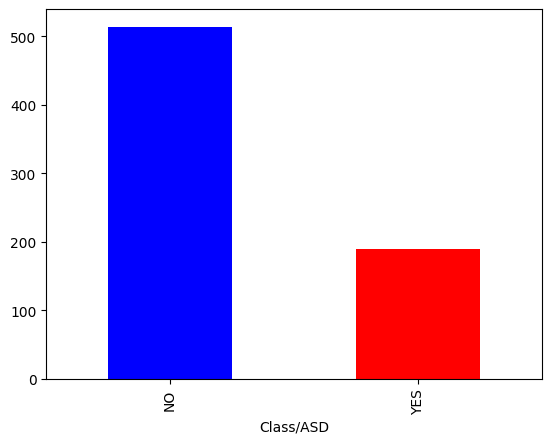

In [17]:
# Printing out the label distribution
class_ASD = df['Class/ASD']
df['Class/ASD'].value_counts().plot(kind='bar', color=['Blue', 'Red'])
print(df['Class/ASD'].value_counts())

Count: The number of non-null values in each column.
Mean: The average value of each column.
Std: The standard deviation, a measure of the amount of variation or dispersion in each column.
Min: The minimum value in each column.
25% (Percentile): The 25th percentile, also known as the first quartile.
50% (Percentile): The median or the 50th percentile, representing the middle value of each column.
75% (Percentile): The 75th percentile, also known as the third quartile.
Max: The maximum value in each column.

In [18]:
# Printing out a description of the dataframe
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,0.721195,0.453770,0.458037,0.496444,0.499289,0.284495,0.418208,0.650071,0.324324,0.574680,29.196302,4.880512
std,0.448731,0.498213,0.498591,0.500343,0.500355,0.451495,0.493616,0.477287,0.468455,0.494743,9.697777,2.498992
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,10.000000


This dataset have columns in our DataFrame (attributes) that we don't want to use when training. We will drop these columns first. 
Secondly, much of our data is reported using strings; as a result, we will convert our data to categorical labels.

In [19]:
df.loc[:]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,Others,no,no,Egypt,no,2,18 and more,Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,Others,no,no,Russia,no,7,18 and more,Self,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


In [20]:
df.shape

(703, 21)

In [21]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,Others,no,no,Egypt,no,2,18 and more,Self,NO


In [22]:
# Counting the number of positive and negative ASD diagnostic results and compare them.

ASD_pos = (df['Class/ASD'] == "YES").sum()
ASD_neg = (df['Class/ASD'] == "NO").sum()

In [23]:
print('Number of patients with a positive test result:', ASD_pos)
print('Number of patients with a negative test result:', ASD_neg)

Number of patients with a positive test result: 189
Number of patients with a negative test result: 514


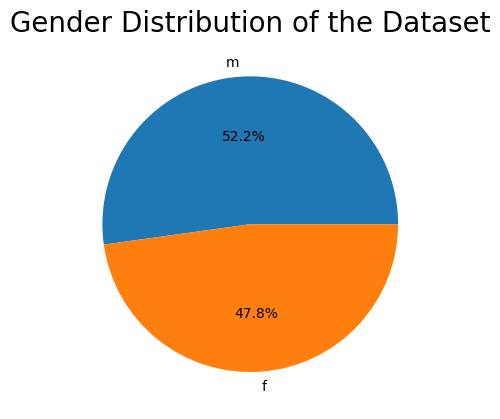

In [24]:
# DATA VISUALISATION

# Calculating the counts of each sex category
sex_counts = df['gender'].value_counts()

# Creating the figure and axis
fig, ax = plt.subplots()

# Plotting the pie chart
ax.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')

# Setting the title
ax.set_title('Gender Distribution of the Dataset', fontsize=20)

# Equal aspect ratio ensures circular shape
ax.set_aspect('equal')

# Visualising the chart
plt.show()

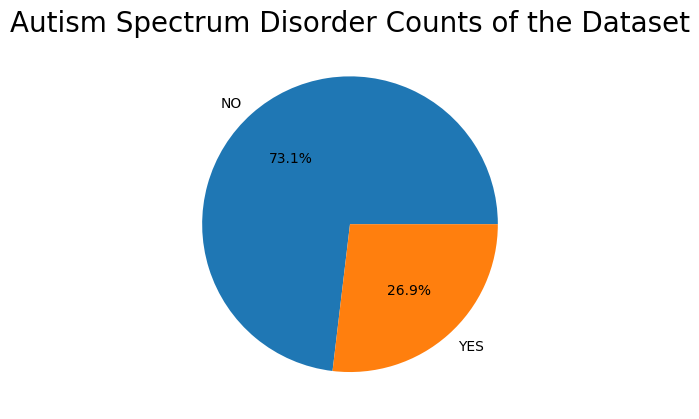

In [25]:
# Calculating the counts of each ASD trait category
asd_counts = df['Class/ASD'].value_counts()

# Creating the figure and axis
fig, ax = plt.subplots()

# Plotting the pie chart
ax.pie(asd_counts, labels=asd_counts.index, autopct='%1.1f%%')

# Setting the title
ax.set_title('Autism Spectrum Disorder Counts of the Dataset', fontsize=20)

# Visualising the chart
plt.show()

In [26]:
# Number of patients with a positive ASD Diagnosis: 189 (26.8%)
# Number of patients with a negative ASD Diagnosis: 515 (73.2%)

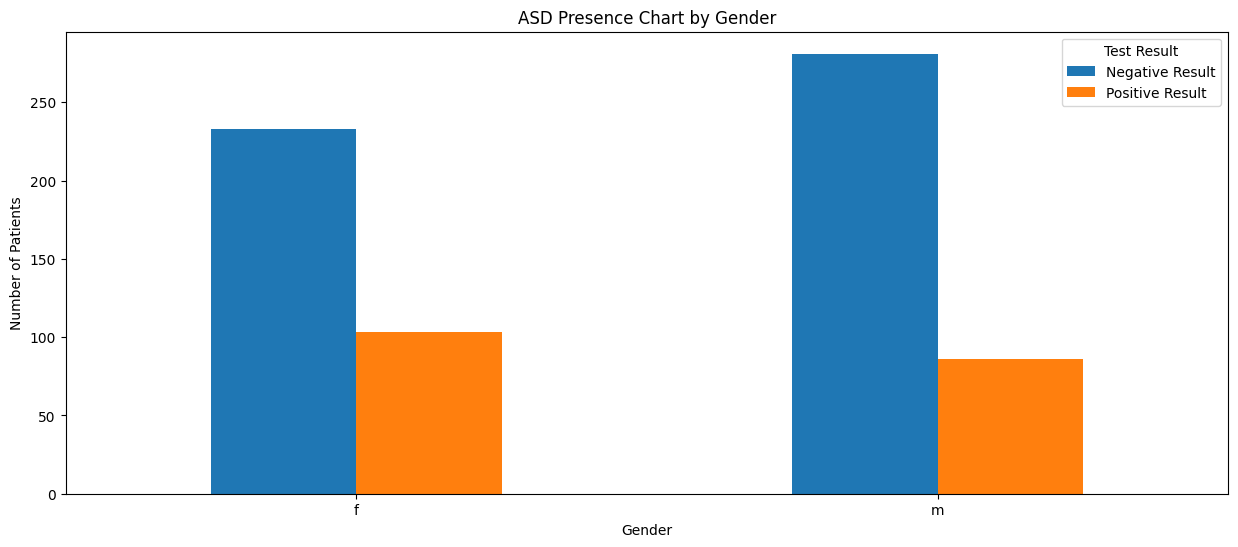

In [27]:
# PATIENT'S GENDER

gender_counts = df.groupby(['gender', 'Class/ASD']).size().unstack(fill_value=0)

gender_counts.plot(kind='bar', figsize=(15, 6))
plt.title('ASD Presence Chart by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

In [28]:
# Calculating the total number of patients by gender

gender_counts = df.groupby(['gender', 'Class/ASD']).size().unstack(fill_value=0)

gender_counts['Patients'] = gender_counts["NO"] + gender_counts["YES"]

In [29]:
# Calculating the percentage of positive and negative ASD diagnoses for each gender

gender_counts['Percentage Negative'] = (gender_counts["NO"] / gender_counts['Patients'] * 100).round(2)
gender_counts['Percentage Positive'] = (gender_counts["YES"] / gender_counts['Patients'] * 100).round(2)

gender_counts

Class/ASD,NO,YES,Patients,Percentage Negative,Percentage Positive
gender,,,,,
f,233,103,336,69.35,30.65
m,281,86,367,76.57,23.43


In [30]:
# Calculating the percentage of positive ASD diagnoses among the total number of females

print('Percentage of positive ASD diagnoses among the total number of females: ' + str(gender_counts['Percentage Positive']["f"]))

Percentage of positive ASD diagnoses among the total number of females: 30.65


In [31]:
# Calculating the percentage of positive ASD diagnoses among the total number of males

print('Percentage of positive ASD diagnoses among the total number of males: ' + str(gender_counts['Percentage Positive']["m"]))

Percentage of positive ASD diagnoses among the total number of males: 23.43


In [32]:
# Calculating the distribution of males and females

sex_counts = df['gender'].value_counts()
print(sex_counts)
total_population = sex_counts.sum()
print('Total Population:', total_population)

# Print percentage of males and females
percentage_male = (sex_counts['m'] / total_population) * 100
percentage_female = (sex_counts['f'] / total_population) * 100

print('Percentage of Males:', percentage_male)
print('Percentage of Females:', percentage_female)

gender
m    367
f    336
Name: count, dtype: int64
Total Population: 703
Percentage of Males: 52.204836415362735
Percentage of Females: 47.795163584637265


In [33]:
# In our dataset, there are more males than females. 
# Males constitute 52.13% of the total number of patients, while females constitute 47.86%. 
# This may be associated with higher sensitivity in males to early symptoms or more frequent medical consultations.
# Analyzing the results of autism spectrum disorder (ASD) diagnosis, it is evident that the percentage of positive diagnoses among females is 30.56%, while among males, this percentage is lower at 23.43%. Thus, more females are diagnosed with ASD compared to males, despite the gender distribution being approximately equal.

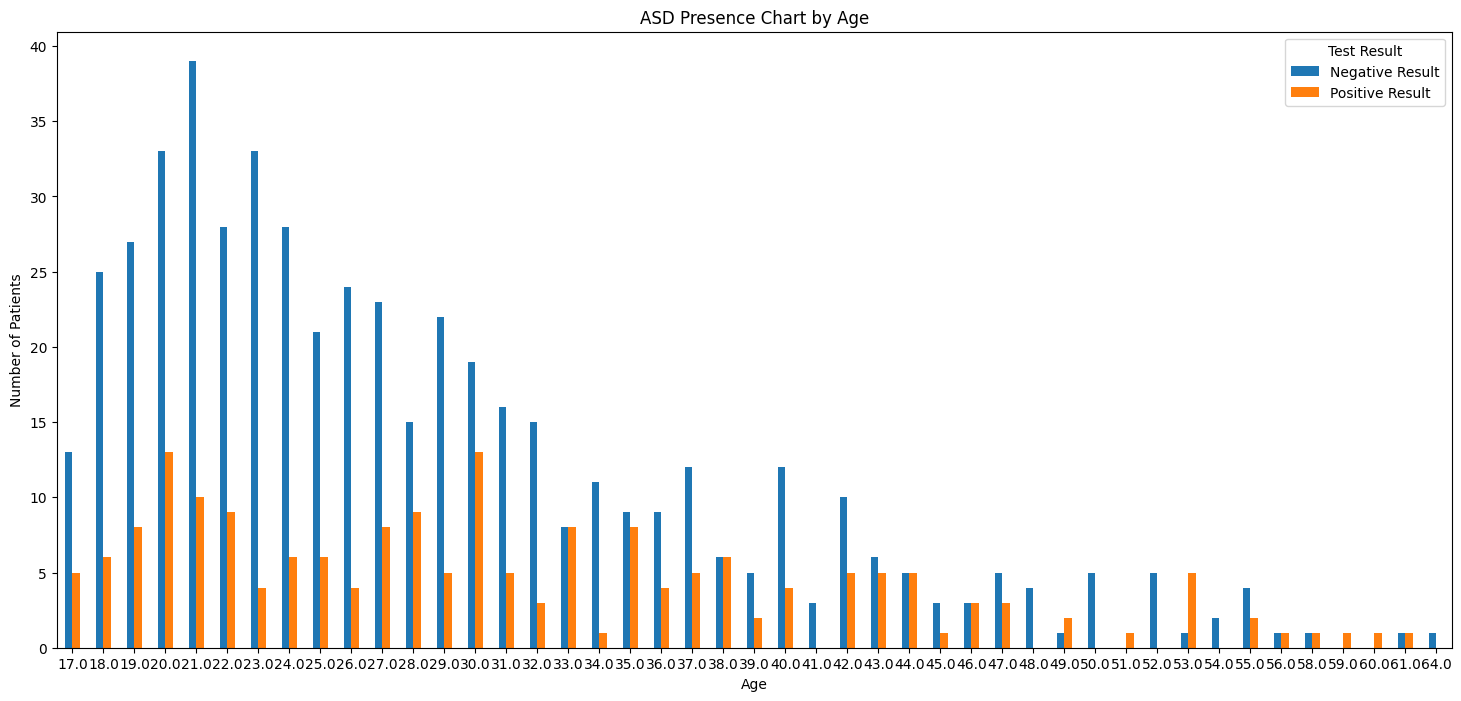

In [34]:
# PATIENT'S AGE

age_counts = df.groupby(['age', 'Class/ASD']).size().unstack(fill_value=0)

age_counts.plot(kind='bar', figsize=(18, 8))
plt.title('ASD Presence Chart by Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

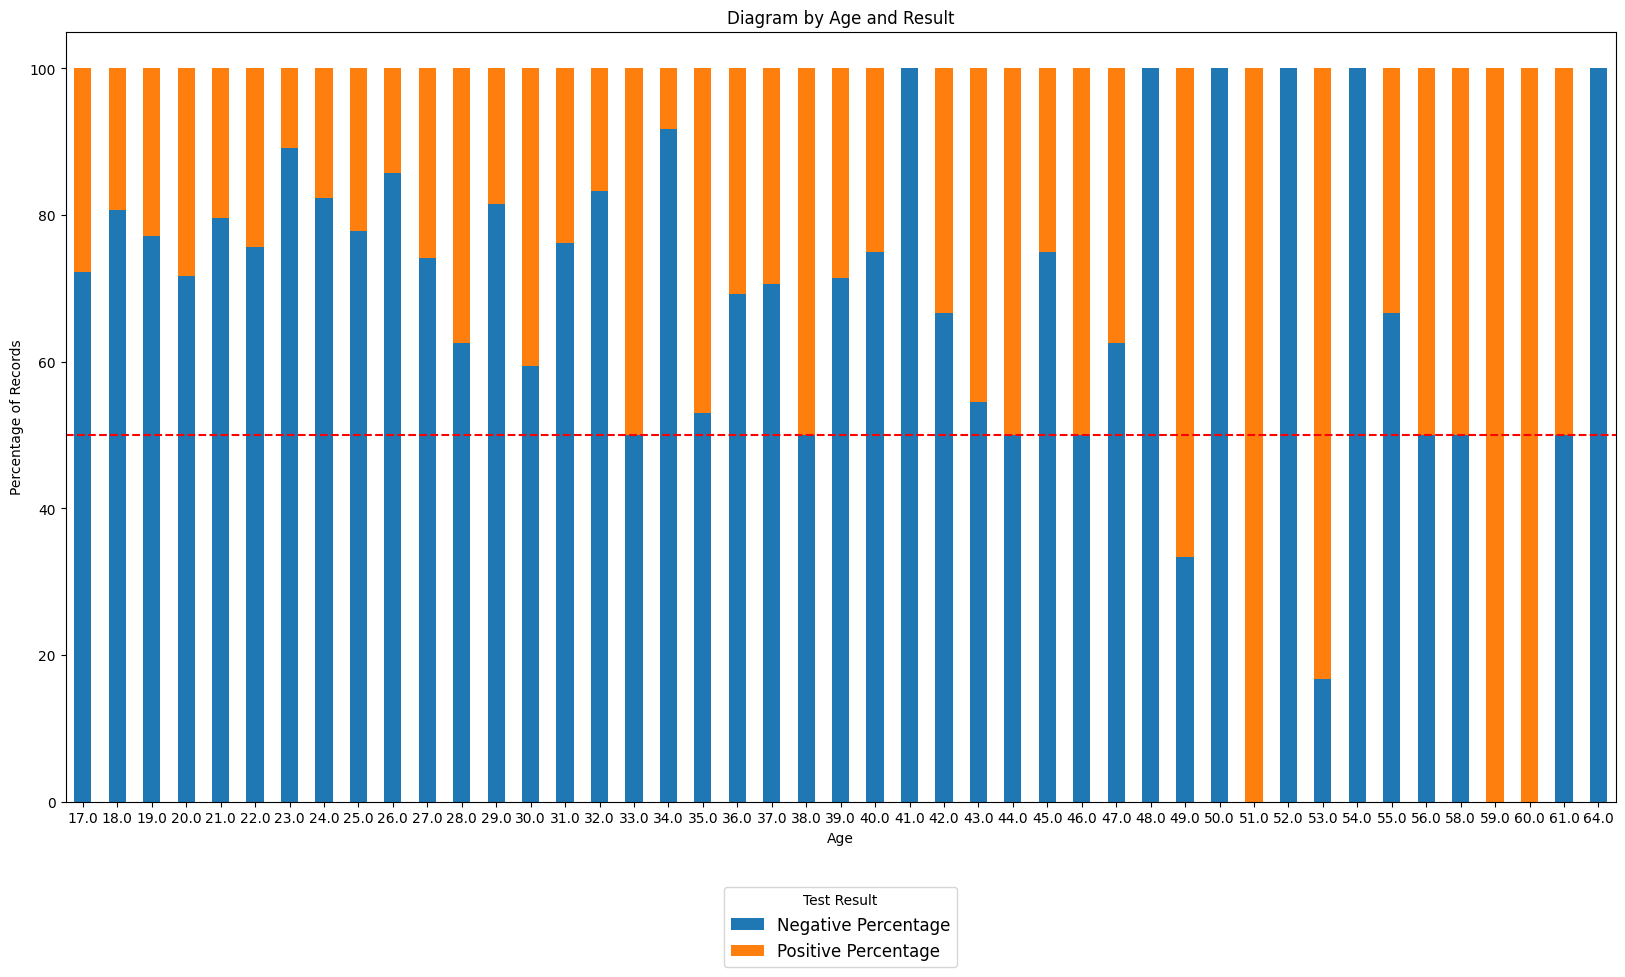

In [35]:
# Taking a closer look at the distribution of positive and negative test results for each age group.

grouped_data = df.groupby(['age', 'Class/ASD']).size().unstack(fill_value=0)

total_counts = grouped_data.sum(axis=1)

grouped_data['Negative Percentage'] = (grouped_data["NO"] / total_counts * 100).round(2)
grouped_data['Positive Percentage'] = (grouped_data["YES"] / total_counts * 100).round(2)

grouped_data[['Negative Percentage', 'Positive Percentage']].plot(kind='bar', stacked=True, figsize=(20, 10))

plt.legend(['Negative Percentage', 'Positive Percentage'], title='Test Result', bbox_to_anchor=(0.5, -0.10), loc='upper center', fontsize='large')
plt.axhline(y=50, color='r', linestyle='--') # line indicating 50%
plt.title('Diagram by Age and Result')
plt.xlabel('Age')
plt.ylabel('Percentage of Records')
plt.xticks(rotation=0)

plt.show()

In [36]:
grouped_data['Count of patients'] = grouped_data["NO"] + grouped_data["YES"]
grouped_data.head()

Class/ASD,NO,YES,Negative Percentage,Positive Percentage,Count of patients
age,,,,,
17.0,13,5,72.22,27.78,18
18.0,25,6,80.65,19.35,31
19.0,27,8,77.14,22.86,35
20.0,33,13,71.74,28.26,46
21.0,39,10,79.59,20.41,49


ETHNICITY

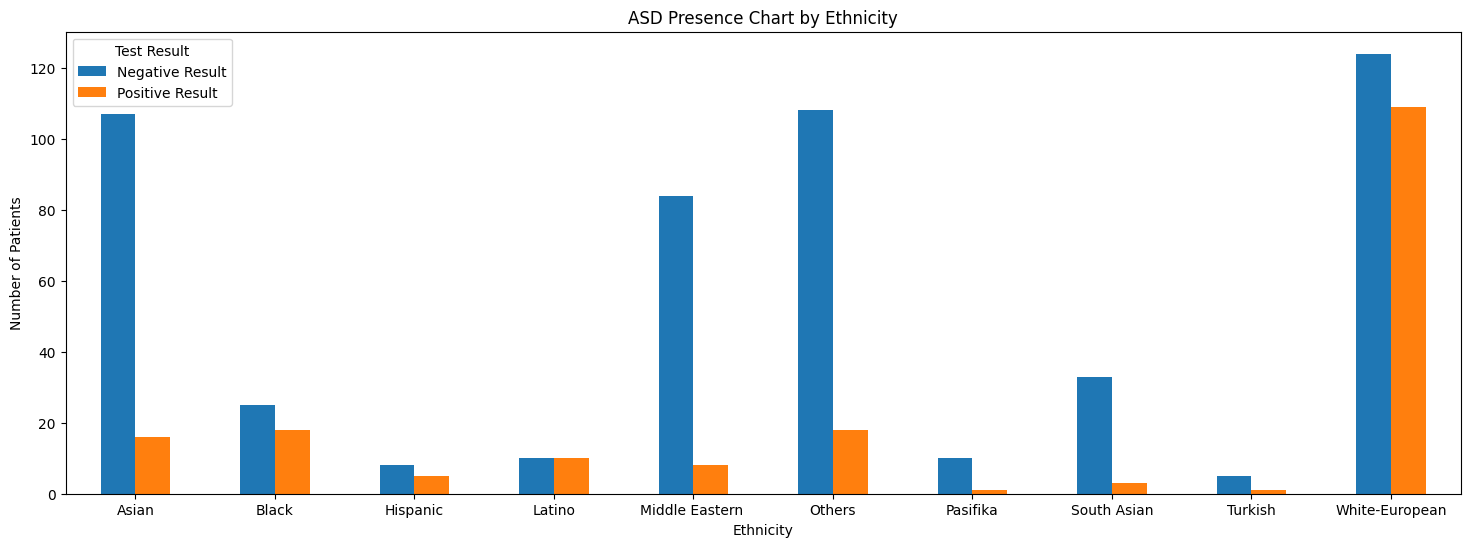

In [37]:
# PATIENT'S ETHNICITY

ethnicity_counts = df.groupby(['ethnicity', 'Class/ASD']).size().unstack(fill_value=0)

ethnicity_counts.plot(kind='bar', figsize=(18, 6))
plt.title('ASD Presence Chart by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

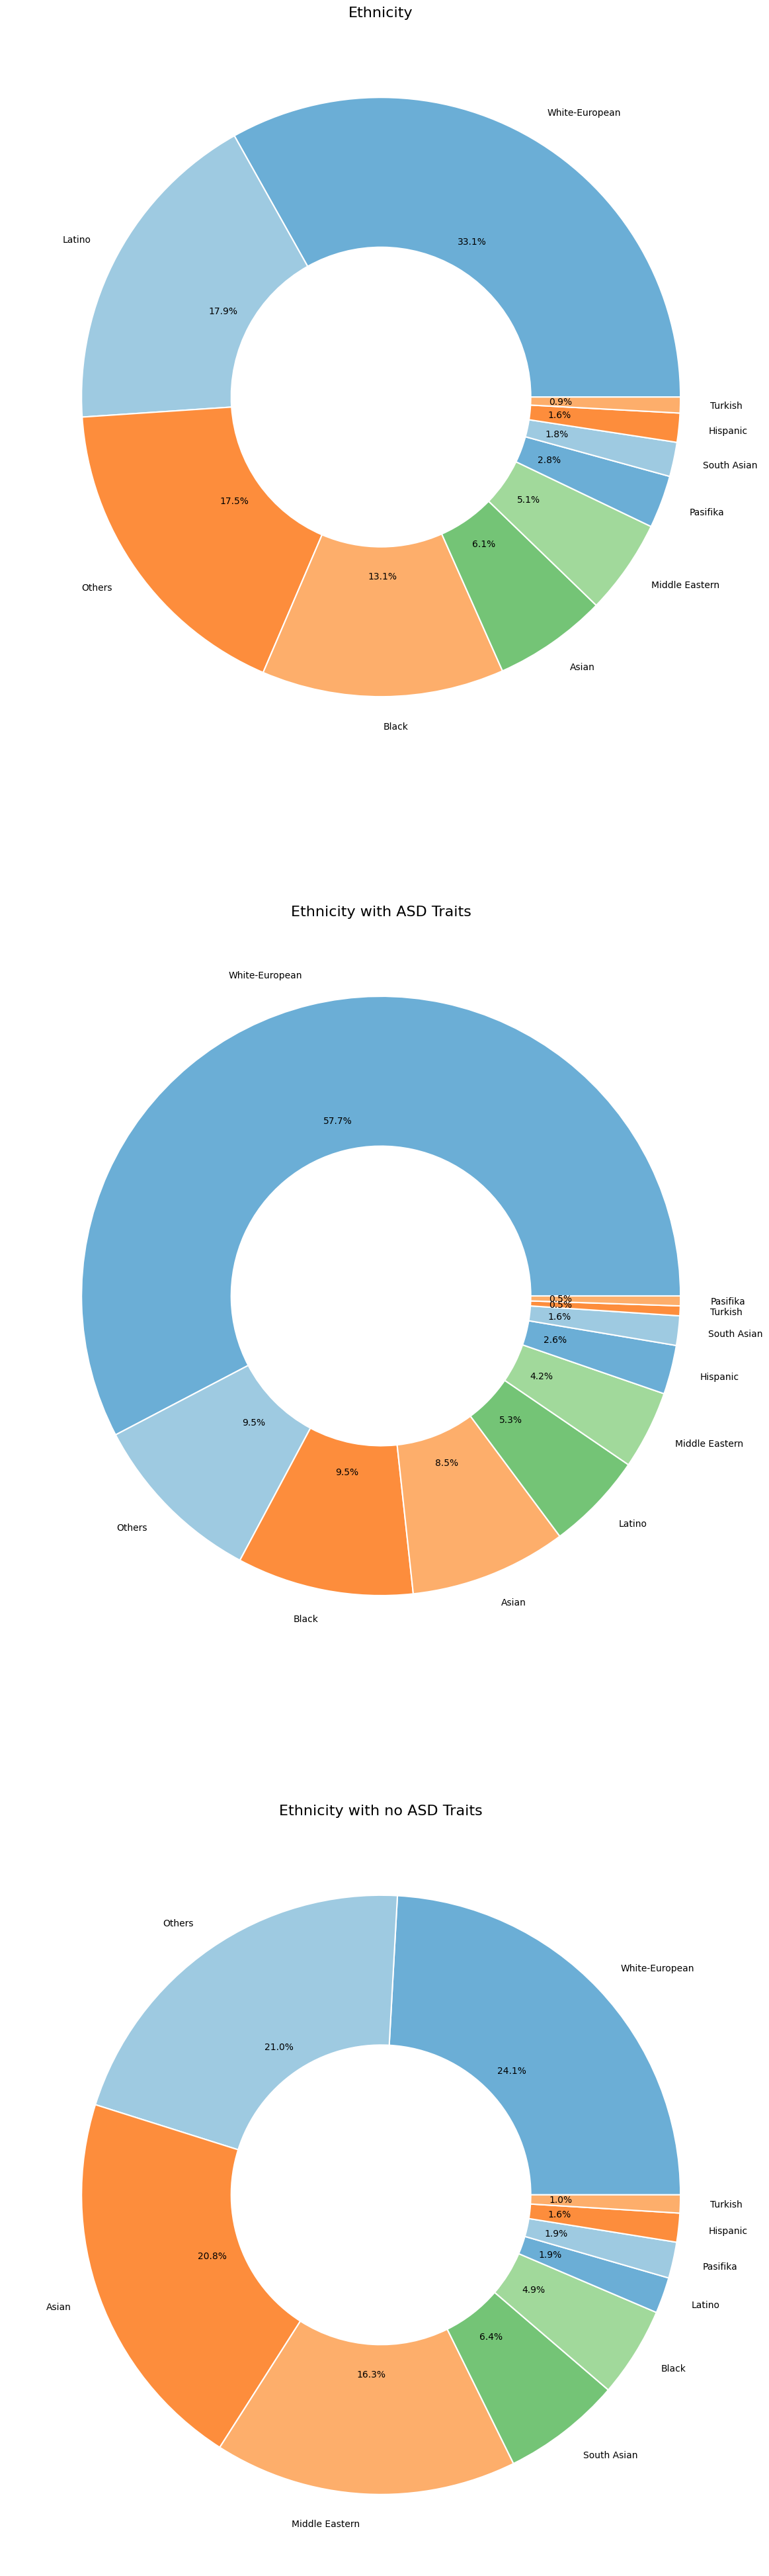

In [38]:
# Ethnicity Distribution with and without ASD
fig, ax = plt.subplots(3, 1, figsize=(50, 50))

size = 0.5
eth_vals = df["ethnicity"].value_counts()
labels_eth = ['White-European', 'Latino', 'Others', 'Black', 'Asian', 'Middle Eastern',
              'Pasifika', 'South Asian', 'Hispanic', 'Turkish']

yes = df[df["Class/ASD"] == "YES"]["ethnicity"].value_counts()
no = df[df["Class/ASD"] == "NO"]["ethnicity"].value_counts()

asd_vals = df["Class/ASD"].value_counts()
labels_asd = ['YES', 'NO']  # Corrected the order

cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1, 2, 5, 6, 9, 10])

# Adjusting the font size for better visibility
font_size = 10

ax[0].pie(eth_vals, radius=1, colors=outer_colors, labels=labels_eth, autopct="%1.1f%%",
          wedgeprops=dict(width=size, edgecolor='w', linewidth=1.5), textprops=dict(size=font_size))
ax[0].set_title("Ethnicity", fontsize=16)

ax[1].pie(yes, radius=1, colors=outer_colors, labels=yes.index, autopct="%1.1f%%",
          wedgeprops=dict(width=size, edgecolor='w', linewidth=1.5), textprops=dict(size=font_size))
ax[1].set_title("Ethnicity with ASD Traits", fontsize=16)

ax[2].pie(no, radius=1, colors=outer_colors, labels=no.index, autopct="%1.1f%%",
          wedgeprops=dict(width=size, edgecolor='w', linewidth=1.5), textprops=dict(size=font_size))
ax[2].set_title("Ethnicity with no ASD Traits", fontsize=16)

plt.show()

In [39]:
# Calculating the number of patients for each ethnic group

ethnicity_counts['Total Patients'] = ethnicity_counts["NO"] + ethnicity_counts["YES"]
ethnicity_counts['% Positive'] = (ethnicity_counts["YES"] / ethnicity_counts['Total Patients'] * 100).round(2)
ethnicity_counts['% of Total Patients'] = (ethnicity_counts['Total Patients'] / 1000 * 100).round(2)
ethnicity_counts['% Positive Patients in Ethnic Group'] = (ethnicity_counts["YES"] / 1000 * 100).round(2)
ethnicity_counts['% Positive Patients in Ethnic Group Relative to All Positive'] = (ethnicity_counts["YES"] / ASD_pos * 100).round(2)
ethnicity_counts

Class/ASD,NO,YES,Total Patients,% Positive,% of Total Patients,% Positive Patients in Ethnic Group,% Positive Patients in Ethnic Group Relative to All Positive
ethnicity,,,,,,,
Asian,107,16,123,13.01,12.3,1.6,8.47
Black,25,18,43,41.86,4.3,1.8,9.52
Hispanic,8,5,13,38.46,1.3,0.5,2.65
Latino,10,10,20,50.00,2.0,1.0,5.29
Middle Eastern,84,8,92,8.70,9.2,0.8,4.23
Others,108,18,126,14.29,12.6,1.8,9.52
Pasifika,10,1,11,9.09,1.1,0.1,0.53
South Asian,33,3,36,8.33,3.6,0.3,1.59
Turkish,5,1,6,16.67,0.6,0.1,0.53


In [40]:
# The ethnic group White-European has the highest percentage of positive results (11.8%) in the overall dataset
# and also the highest among all positively diagnosed patients (62.43%), while the ethnic groups Pasifika (0.1%) 
# and Turkish (0.1%) have much lower percentages in the overall dataset.

# There is also a significant percentage of cases with unknown ethnicity. Noticeably, the percentage of positive 
# patients in the Others ethnic group is 4.76% relative to all positively diagnosed patients.

# Further research is needed to understand the reasons behind such values and to clarify information about ethnicity.

# When considering each ethnic group separately, the highest percentage of positively diagnosed patients is observed 
# in Latino with 50%, followed by Black with 41.86%.22%.

Jaundice

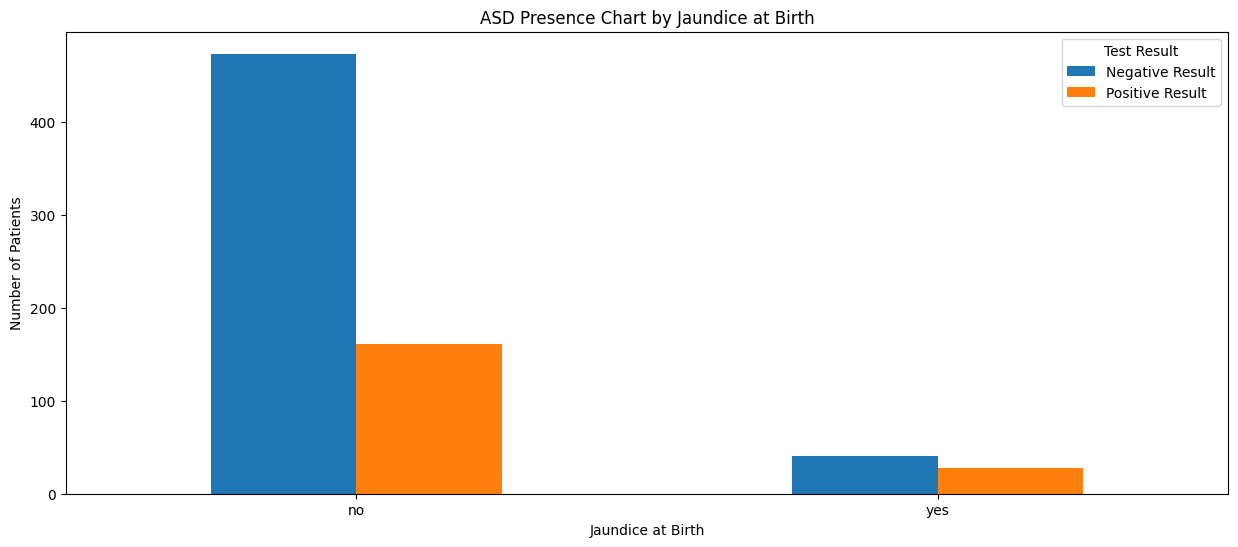

In [41]:
# PATIENT'S JAUNDICE

jaundice_counts = df.groupby(['jaundice', 'Class/ASD']).size().unstack(fill_value=0)

jaundice_counts.plot(kind='bar', figsize=(15, 6))
plt.title('ASD Presence Chart by Jaundice at Birth')
plt.xlabel('Jaundice at Birth')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

In [42]:
# Calculating the number of patients related to jaundice feature

jaundice_counts['Total Patients'] = jaundice_counts["NO"] + jaundice_counts["YES"]
jaundice_counts['% Positive Diagnoses'] = (jaundice_counts["YES"] / jaundice_counts['Total Patients'] * 100).round(2)
jaundice_counts['% Positive Patients Relative to All'] = (jaundice_counts["YES"] / 1000 * 100).round(2)
jaundice_counts['% Positive Patients Relative to Positive'] = (jaundice_counts["YES"] / ASD_pos * 100).round(2)
jaundice_counts

Class/ASD,NO,YES,Total Patients,% Positive Diagnoses,% Positive Patients Relative to All,% Positive Patients Relative to Positive
jaundice,,,,,,
no,473,161,634,25.39,16.1,85.19
yes,41,28,69,40.58,2.8,14.81


The percentage of positive diagnoses among patients who had jaundice at birth is 40.58%, significantly higher than among patients without jaundice at birth, where this percentage is 25.35%. This may indicate a connection between the presence of jaundice and the likelihood of a positive ASD diagnosis.

Patients who had jaundice at birth and were diagnosed with ASD constitute 14.81% of the total net positive diagnosed patients

Family member has been diagnosed with autism

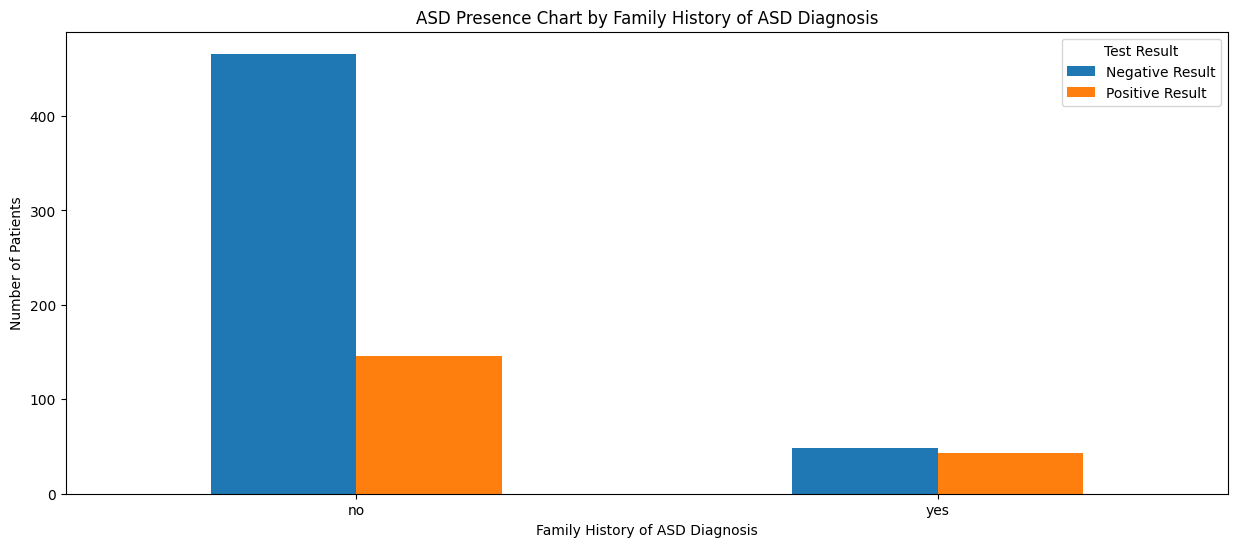

In [43]:
# PATIENT'S FAMILY

autism_counts = df.groupby(['autism', 'Class/ASD']).size().unstack(fill_value=0)

autism_counts.plot(kind='bar', figsize=(15, 6))
plt.title('ASD Presence Chart by Family History of ASD Diagnosis')
plt.xlabel('Family History of ASD Diagnosis')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

In [44]:
# Calculating total number of patients in groups

autism_counts['Total Patients in Groups'] = autism_counts["NO"] + autism_counts["YES"]
autism_counts['% Positive Diagnoses in Groups'] = (autism_counts["YES"] / autism_counts['Total Patients in Groups'] * 100).round(2)
autism_counts['% Positive Patients in Group Relative to Total'] = (autism_counts["YES"] / 1000 * 100).round(2)
autism_counts['% Positive Patients in Group Relative to Positive'] = (autism_counts["YES"] / ASD_pos * 100).round(2)
autism_counts

Class/ASD,NO,YES,Total Patients in Groups,% Positive Diagnoses in Groups,% Positive Patients in Group Relative to Total,% Positive Patients in Group Relative to Positive
autism,,,,,,
no,466,146,612,23.86,14.6,77.25
yes,48,43,91,47.25,4.3,22.75


The group of patients with no family history of ASD diagnosis constitutes a significant majority - 613 members. In this group, the percentage of positive diagnoses is 23.82%, and in the context of all positively diagnosed patients, it is 77.25%.

The group of patients with a family history of ASD diagnosis is relatively small - 91 members. However, in this group, there is a high percentage of positive diagnoses - 47.25%, but in the context of all positively diagnosed patients, it is 22.75%.

Country of residence

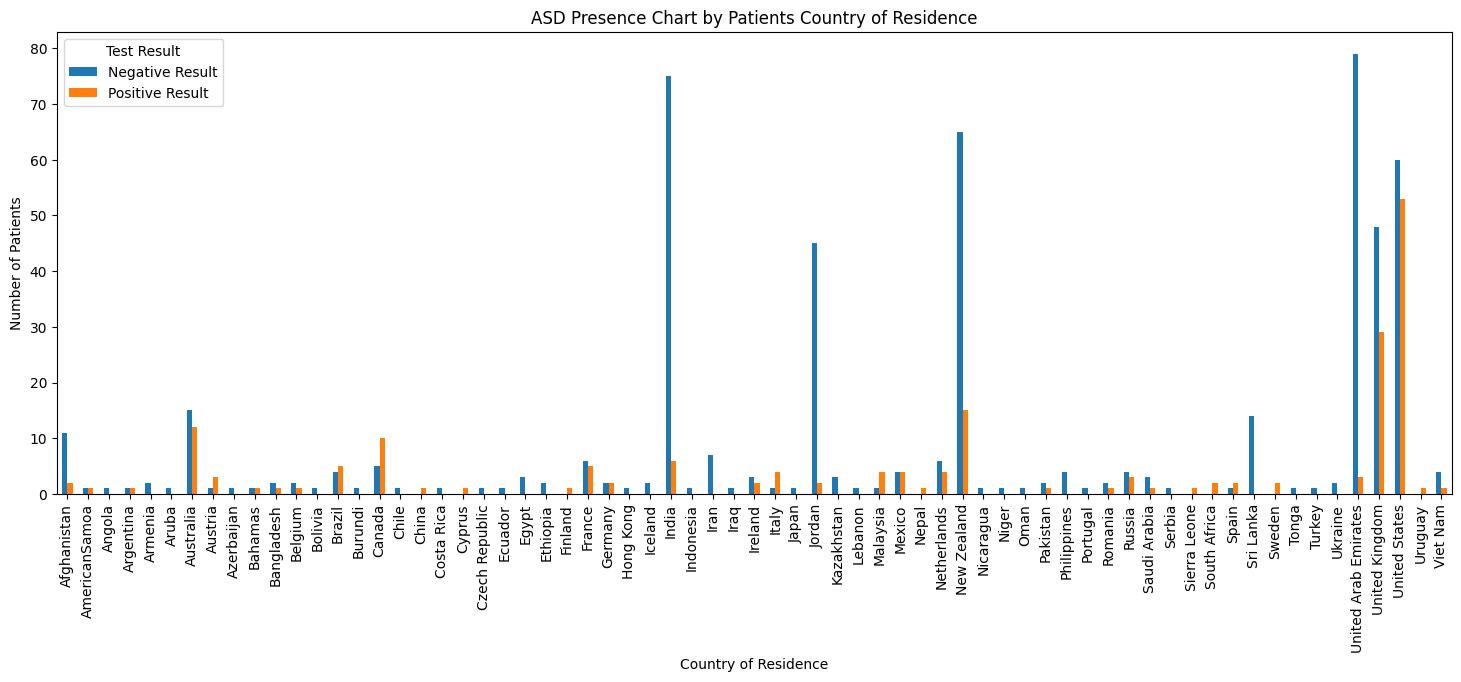

In [45]:
country_of_res_counts = df.groupby(['country_of_res', 'Class/ASD']).size().unstack(fill_value=0)

country_of_res_counts.plot(kind='bar', figsize=(18, 6))
plt.title('ASD Presence Chart by Patients Country of Residence')
plt.xlabel('Country of Residence')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.show()

In [46]:
# Calculating the total patients in groups by country of residence

country_of_res_counts['Total Patients in Groups'] = country_of_res_counts["NO"] + country_of_res_counts["YES"]
country_of_res_counts['% Positive Diagnoses in Groups'] = (country_of_res_counts["YES"] / country_of_res_counts['Total Patients in Groups'] * 100).round(2)
country_of_res_counts['% Positive Patients in Group Relative to Total'] = (country_of_res_counts["YES"] / 1000 * 100).round(2)
country_of_res_counts['% Positive Patients in Group Relative to Positive'] = (country_of_res_counts["YES"] / ASD_pos * 100).round(2)
country_of_res_counts

Class/ASD,NO,YES,Total Patients in Groups,% Positive Diagnoses in Groups,% Positive Patients in Group Relative to Total,% Positive Patients in Group Relative to Positive
country_of_res,,,,,,
Afghanistan,11,2,13,15.38,0.2,1.06
AmericanSamoa,1,1,2,50.00,0.1,0.53
Angola,1,0,1,0.00,0.0,0.00
Argentina,1,1,2,50.00,0.1,0.53
Armenia,2,0,2,0.00,0.0,0.00
...,...,...,...,...,...,...
United Arab Emirates,79,3,82,3.66,0.3,1.59
United Kingdom,48,29,77,37.66,2.9,15.34
United States,60,53,113,46.90,5.3,28.04


In [47]:
max_value = country_of_res_counts.iloc[:, -1].max()
max_value
country_with_max_value = country_of_res_counts[country_of_res_counts.iloc[:, -1] == max_value].index[0]
print('Country with the highest percentage of positively diagnosed patients among all positive patients: ' + country_with_max_value + ' with a value of ' + str(max_value))

Country with the highest percentage of positively diagnosed patients among all positive patients: United States with a value of 28.04


In [48]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,Others,no,no,Egypt,no,2,18 and more,Self,NO


In [49]:
# The questions to relate for the AQ-10 Autism Spectrum Quotient. 
# Should be answered in YES or NO

description2 = pd.DataFrame([
    ["AQ-1", "I often notice small sounds when others do not."],
    ["AQ-2", "I usually concentrate more on the whole picture, rather than the small details."],
    ["AQ-3", "I find it easy to do more than one thing at once."],
    ["AQ-4", "If there is an interruption, I can switch back to what I was doing very quickly."],
    ["AQ-5", "I find it easy to ‘read between the lines’ when someone is talking to me."],
    ["AQ-6", "I know how to tell if someone listening to me is getting bored."],
    ["AQ-7", "When I’m reading a story I find it difficult to work out the characters’ intentions."],
    ["AQ-8", "I like to collect information about categories of things (e.g. types of car, types of bird, types of train, types of plant etc)."],
    ["AQ-9", "I find it easy to work out what someone is thinking or feeling just by looking at their face."],
    ["AQ-10", "I find it difficult to work out people’s intentions."]
], columns=['Feature', 'Description'])

description2.set_index('Feature', inplace=True)

description2

,Description
Feature,
AQ-1,I often notice small sounds when others do not.
AQ-2,I usually concentrate more on the whole pictur...
AQ-3,I find it easy to do more than one thing at once.
AQ-4,"If there is an interruption, I can switch back..."
AQ-5,I find it easy to ‘read between the lines’ whe...
AQ-6,I know how to tell if someone listening to me ...
AQ-7,When I’m reading a story I find it difficult t...
AQ-8,I like to collect information about categories...
AQ-9,I find it easy to work out what someone is thi...


What Features from A1 to A10 contributes the most in ASD traits?

In [50]:
df.iloc[:, 0:10].head(1)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,1,1,1,1,0,0,1,1,0,0


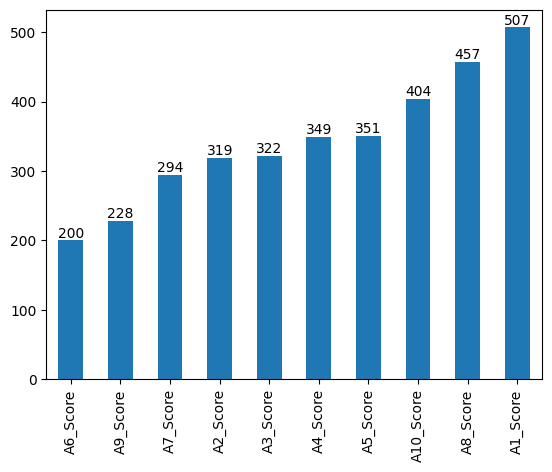

In [51]:
ax = df.iloc[:, 0:10].sum().sort_values().plot(kind="bar")
ax.bar_label(ax.containers[0]);

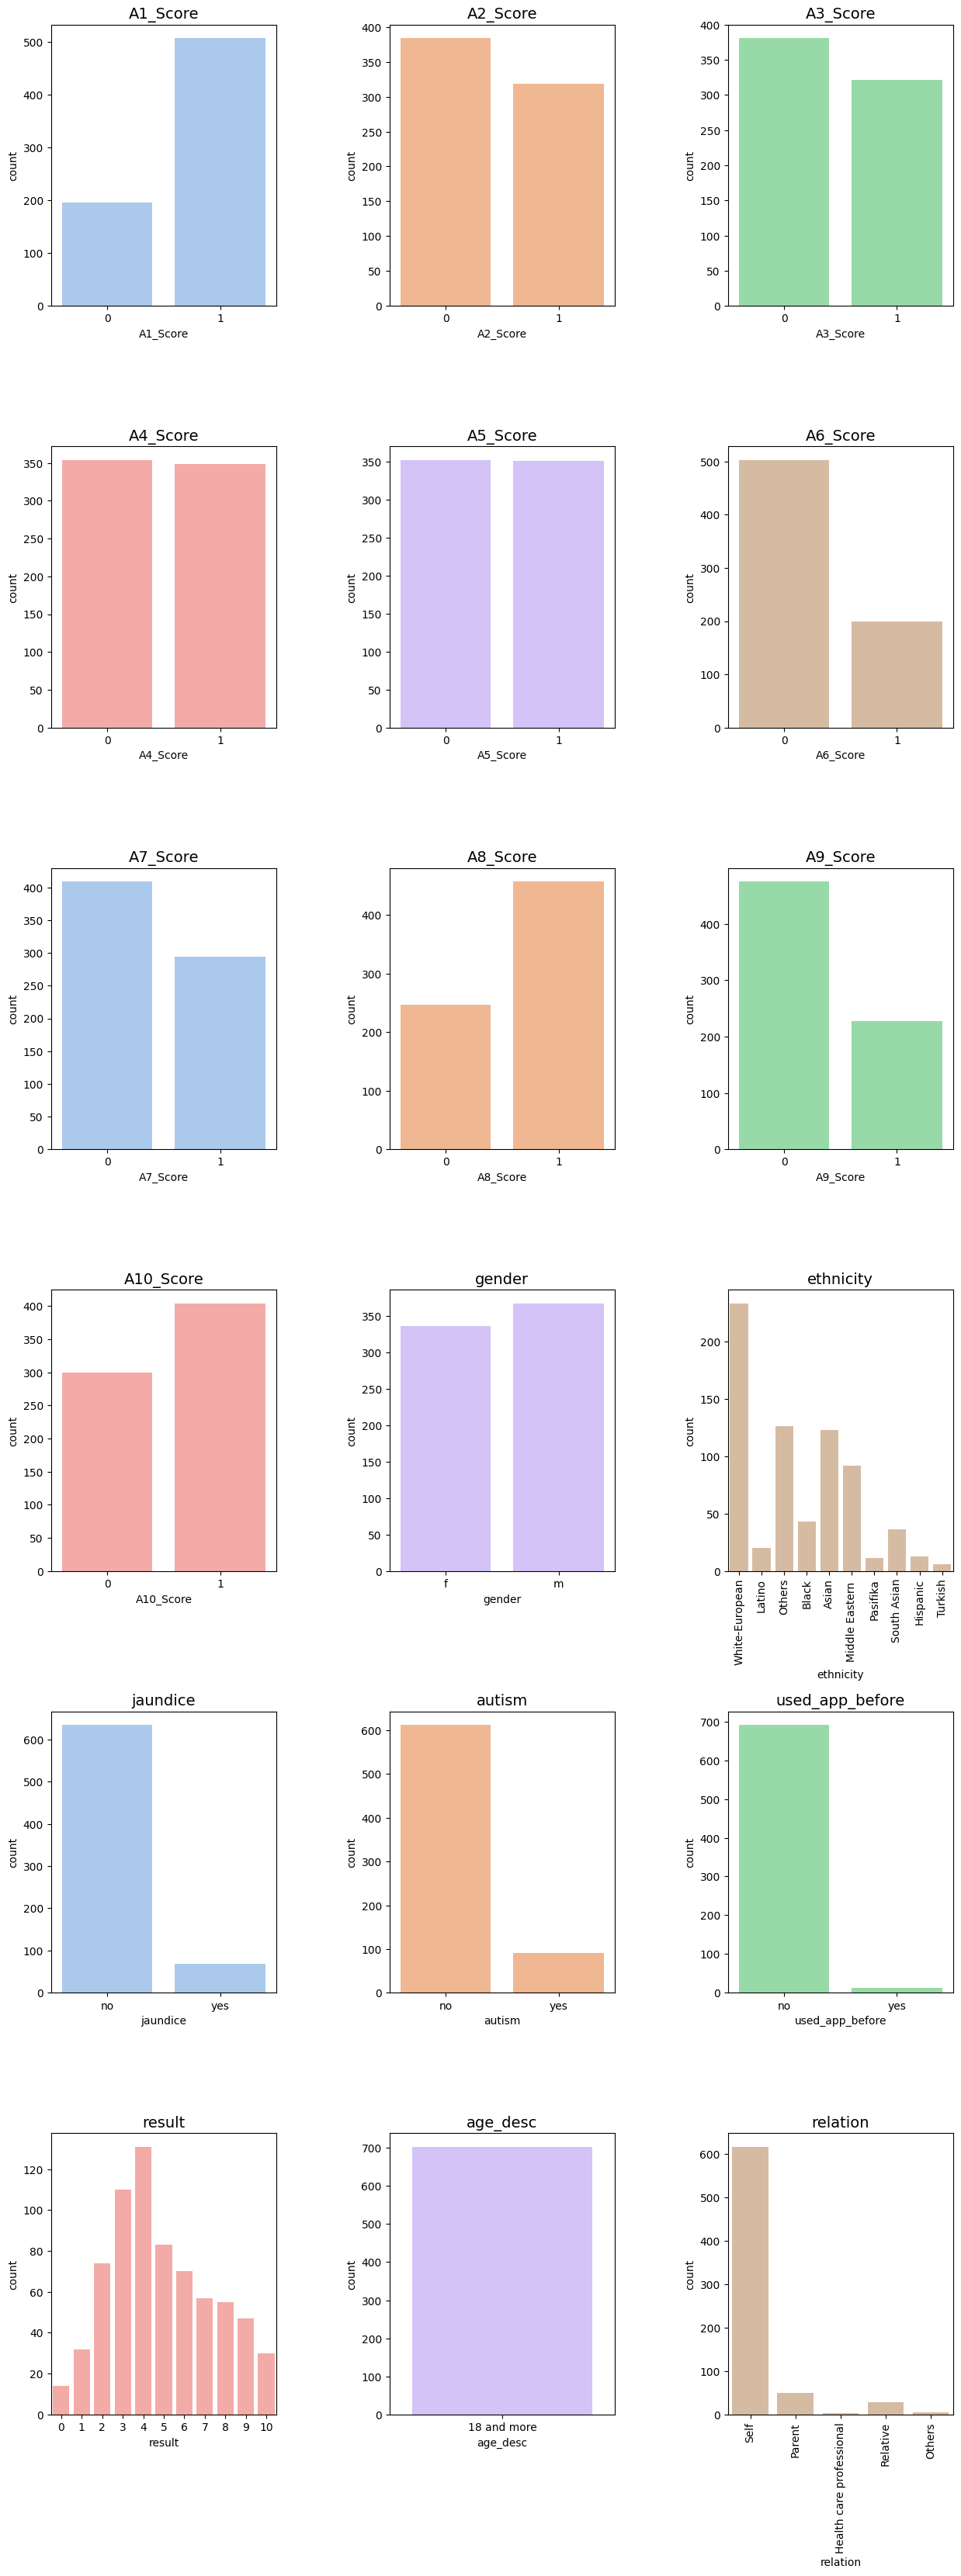

In [52]:
# Countplot of all Features in the dataset excluding "age" and "country_of_res"

# Create subplots with a gap between plots
fig, axes = plt.subplots(6, 3, figsize=(15, 40), gridspec_kw={'hspace': 0.5})

axes = axes.ravel()
colors = sns.color_palette("pastel", n_colors=6)  # Using a seaborn color palette with 6 colors

# Filter out "age" and "country_of_res" from the columns
columns_to_plot = [col for col in df.iloc[:, 0:].columns if col not in ["age", "country_of_res"]]

for i, col in enumerate(columns_to_plot):
    if i < len(axes):  # Ensuring the index is within bounds
        sns.countplot(x=col, data=df, ax=axes[i], color=colors[i % len(colors)])
        axes[i].set_title(col, fontsize=14)
        
        # Rotating x-axis labels for specific columns
        if col in ["relation", "ethnicity"]:
            axes[i].tick_params(axis="x", labelrotation=90)

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjusting spacing between subplots
plt.show()

In [53]:
# For "age" column:
num_unique_age = df['age'].nunique()
print(f'Number of unique values in the "age" column: {num_unique_age}')

# For "country_of_res" column:
num_unique_country = df['country_of_res'].nunique()
print(f'Number of unique values in the "country_of_res" column: {num_unique_country}')

Number of unique values in the "age" column: 45
Number of unique values in the "country_of_res" column: 67


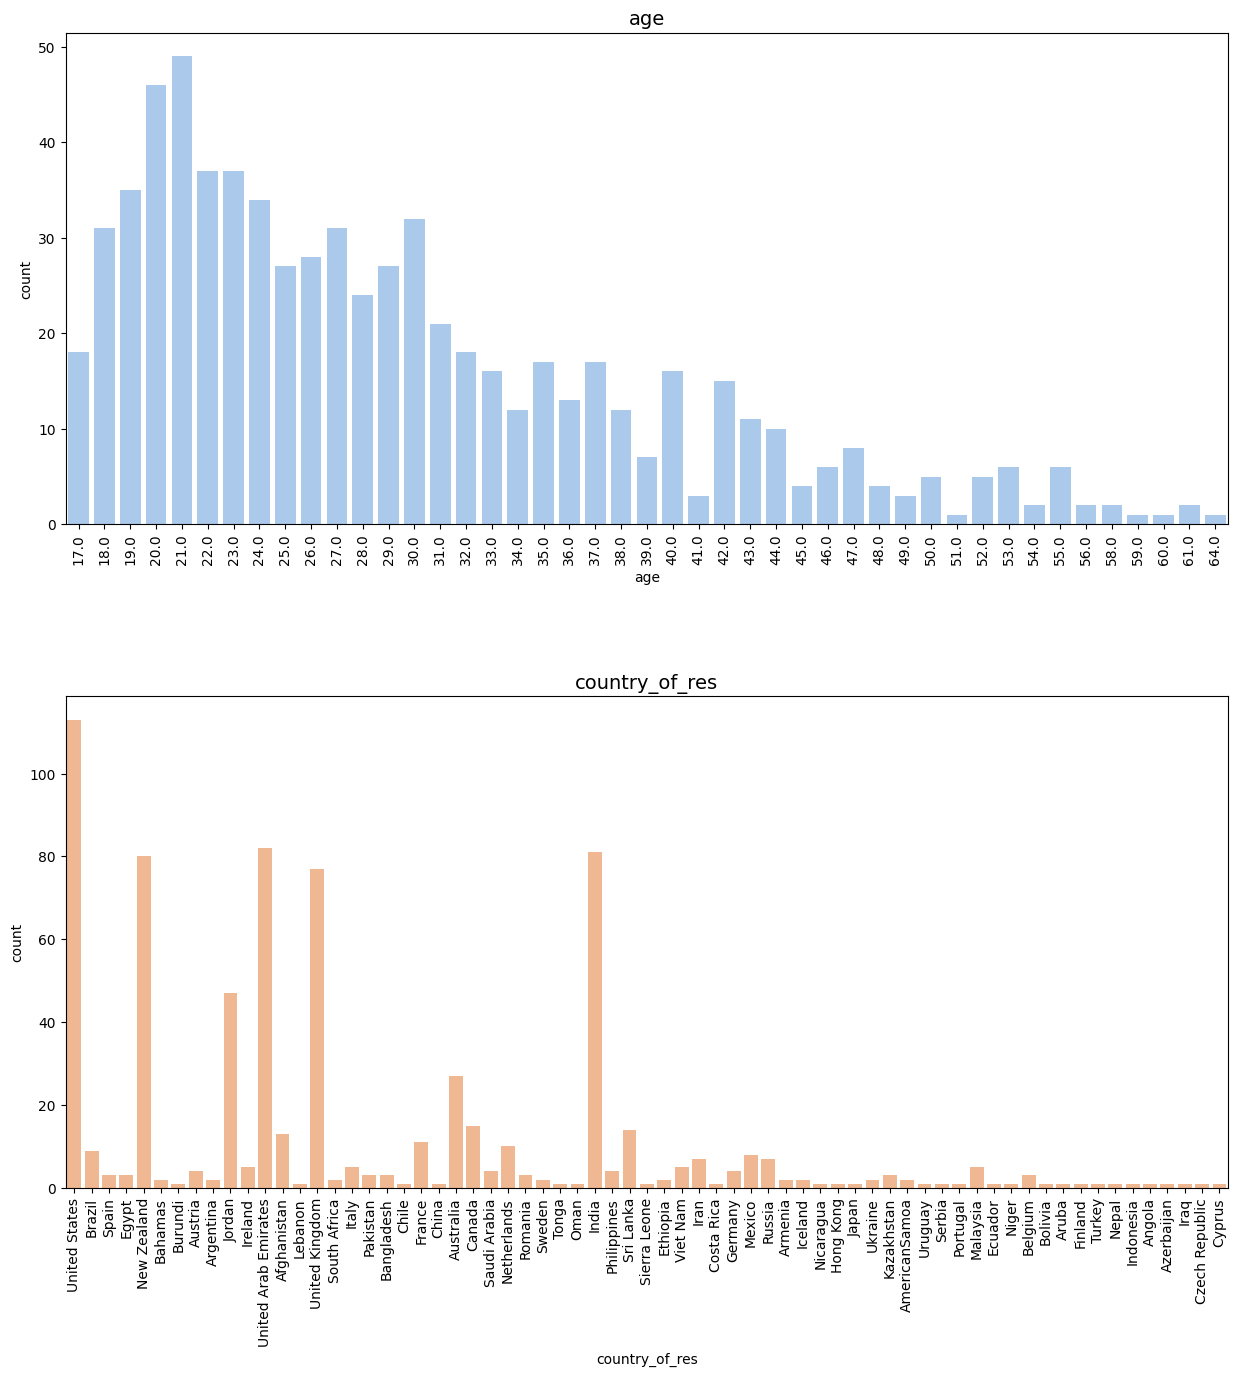

In [54]:
# Countplot of the features "age" and "country_of_res" in the dataset

# Creating subplots with a gap between plots
fig, axes = plt.subplots(2, 1, figsize=(15, 15), gridspec_kw={'hspace': 0.35})

colors = sns.color_palette("pastel", n_colors=2)  # Using a seaborn color palette with 2 colors

# Plotting for "age"
sns.countplot(x="age", data=df, ax=axes[0], color=colors[0])
axes[0].set_title("age", fontsize=14)
axes[0].tick_params(axis="x", labelrotation=90)

# Plotting for "country_of_res"
sns.countplot(x="country_of_res", data=df, ax=axes[1], color=colors[1])
axes[1].set_title("country_of_res", fontsize=14)
axes[1].tick_params(axis="x", labelrotation=90)

plt.subplots_adjust(wspace=1, hspace=0.3)  # Adjusting the space between subplots
plt.show()

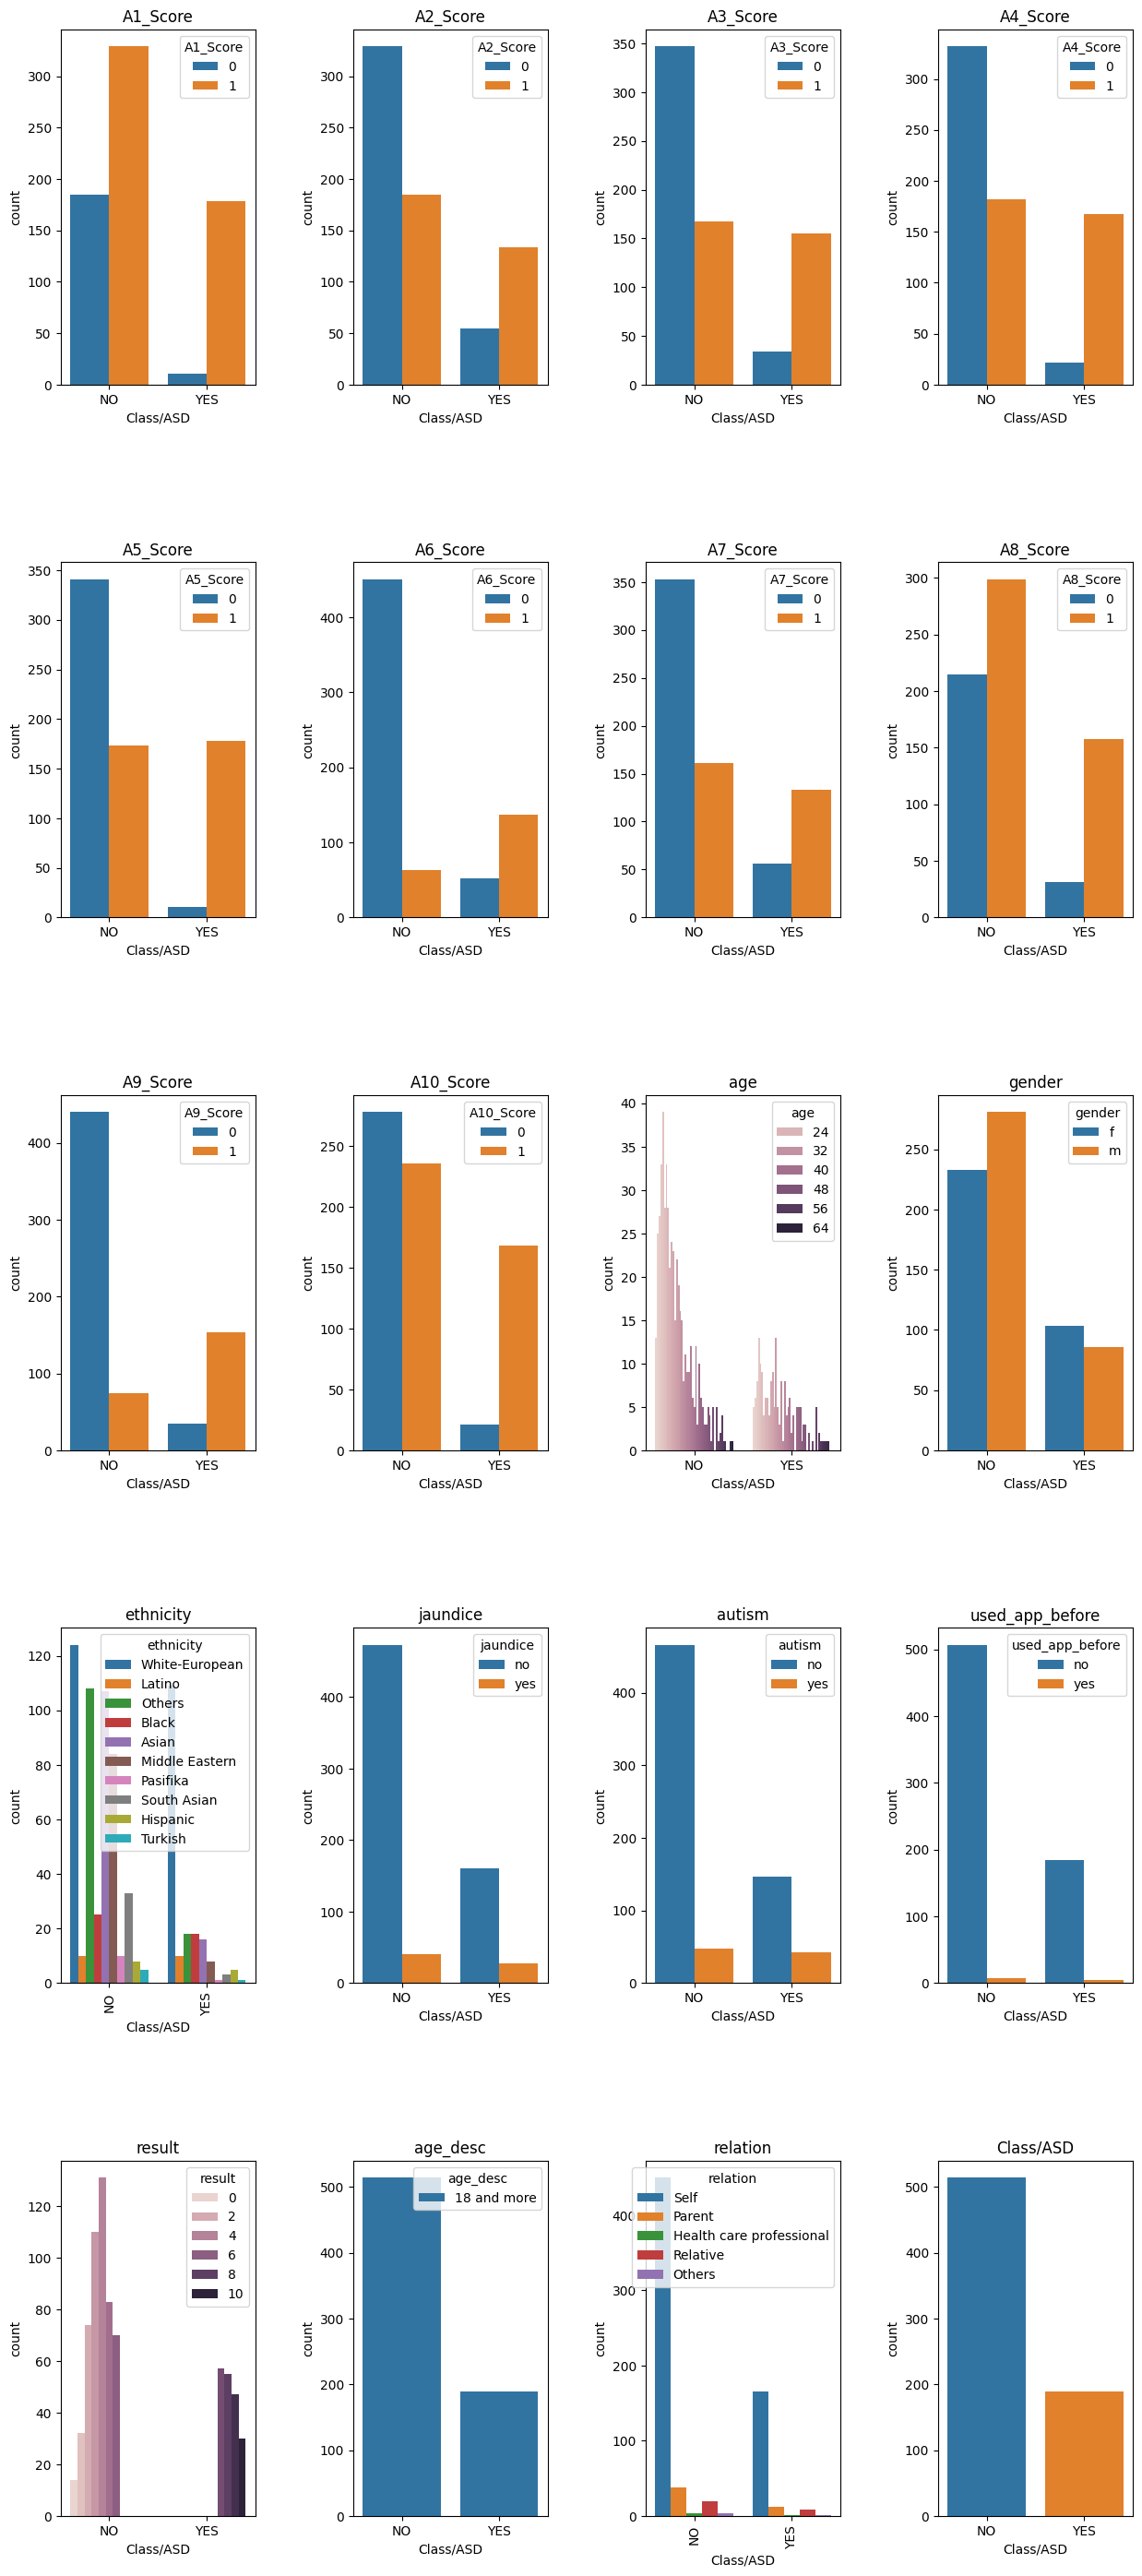

In [55]:
# Multivariate Analysis

# ASD Traits with other features except "country_of_res"

# Creating subplots with a gap between plots
fig, axes = plt.subplots(5, 4, figsize=(15, 35), gridspec_kw={'hspace': 0.5})  # Adjusting the number of columns

axes = axes.ravel()
colors = sns.color_palette("pastel", n_colors=6)  # Using a seaborn color palette with 6 colors

# Filtering out "country_of_res" from the columns
columns_to_plot = [col for col in df.iloc[:, 0:].columns if col not in ["country_of_res"]]

for i, col in enumerate(columns_to_plot):
    if i < len(axes):  # Ensuring the index is within bounds
        sns.countplot(x=df["Class/ASD"], hue=df[col], ax=axes[i])
        axes[i].set_title(col)
    
    # Rotating x-axis labels for specific columns
    if col in ["relation", "ethnicity"]:
        axes[i].tick_params(axis="x", labelrotation=90)

# Manually adjust layout to add more space between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

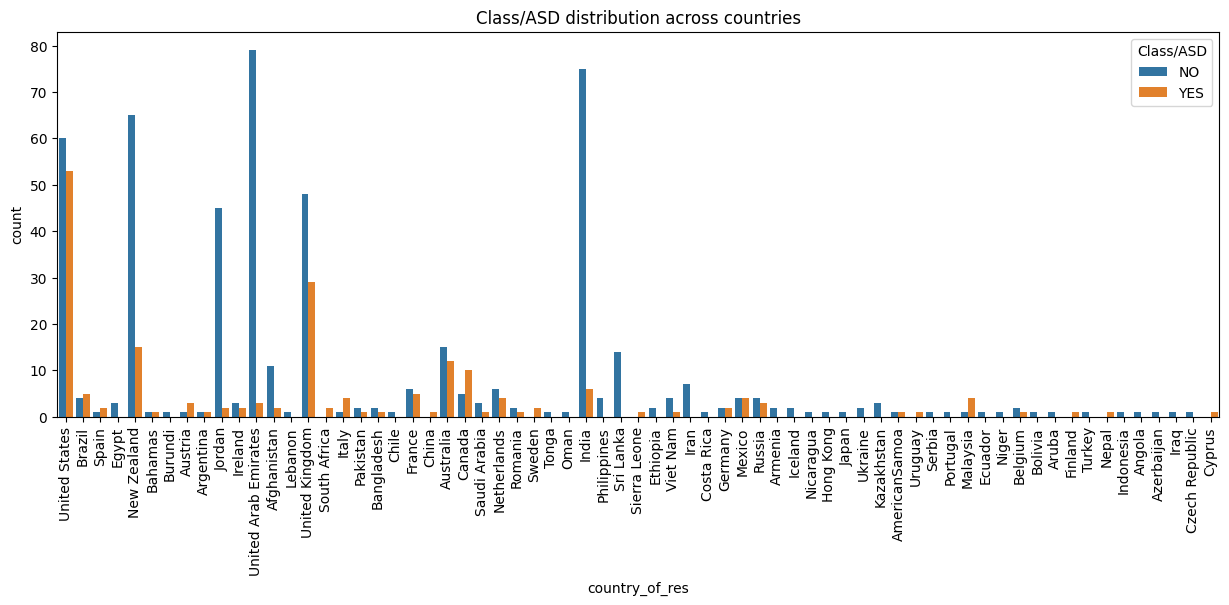

In [56]:
# Multivariate Analysis for "country_of_res"

# Creating subplots with a gap between plots
fig, ax = plt.subplots(figsize=(15,5))

# Plotting "Class/ASD" against "country_of_res"
sns.countplot(x="country_of_res", hue="Class/ASD", data=df, ax=ax)
ax.set_title("Class/ASD distribution across countries")
ax.tick_params(axis="x", labelrotation=90)

# Manually adjusting layout to add more space between subplots
plt.subplots_adjust(wspace=2, hspace=1)
plt.show()

DATA PREPARATION

In [57]:
# Dropping unwanted columns and storing the new data as "data" 
# since result is already given in the target class and age is directly mentioned

data = df.drop(['result', 'age_desc'], axis=1)

In [58]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Others,no,no,Egypt,no,Self,NO


In [59]:
data.tail()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,relation,Class/ASD
699,0,1,0,1,1,0,1,1,1,1,25.0,f,White-European,no,no,Russia,no,Self,YES
700,1,0,0,0,0,0,0,1,0,1,34.0,m,Hispanic,no,no,Mexico,no,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,24.0,f,Others,no,no,Russia,no,Self,YES
702,1,0,0,1,1,0,1,0,1,1,35.0,m,South Asian,no,no,Pakistan,no,Self,NO
703,1,0,1,1,1,0,1,1,1,1,26.0,f,White-European,no,no,Cyprus,no,Self,YES


In [60]:
data['Class/ASD'].unique()

array(['NO', 'YES'], dtype=object)

In [61]:
data['Class/ASD'].replace('NO', 0, inplace=True)
data['Class/ASD'].replace('YES', 1, inplace=True)

data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,Self,0
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,Self,0
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,Self,0
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Others,no,no,Egypt,no,Self,0


In [62]:
data.relation.unique()

array(['Self', 'Parent', 'Health care professional', 'Relative', 'Others'],
      dtype=object)

In [63]:
data['relation'].replace('Health care professional', 0, inplace=True)
data['relation'].replace('Others', 1, inplace=True)
data['relation'].replace('Parent', 2, inplace=True)
data['relation'].replace('Relative', 3, inplace=True)
data['relation'].replace('Self', 4, inplace=True)

In [64]:
data.relation

0      4
1      4
2      2
3      4
4      4
      ..
699    4
700    2
701    4
702    4
703    4
Name: relation, Length: 703, dtype: int64

In [65]:
data.autism.unique()

array(['no', 'yes'], dtype=object)

In [66]:
data['autism'].replace('no', 0, inplace=True)
data['autism'].replace('yes', 1, inplace=True)

data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,0,United States,no,4,0
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,1,Brazil,no,4,0
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,1,Spain,no,2,1
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,1,United States,no,4,0
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Others,no,0,Egypt,no,4,0


In [67]:
data.ethnicity.unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish'], dtype=object)

In [68]:
data['ethnicity'].replace('White-European', 0, inplace=True)
data['ethnicity'].replace('Latino', 1, inplace=True)
data['ethnicity'].replace('Others', 2, inplace=True)
data['ethnicity'].replace('Black', 3, inplace=True)
data['ethnicity'].replace('Asian', 4, inplace=True)
data['ethnicity'].replace('Middle Eastern ', 5, inplace=True)
data['ethnicity'].replace('Pasifika', 6, inplace=True)
data['ethnicity'].replace('South Asian', 7, inplace=True)
data['ethnicity'].replace('Hispanic', 8, inplace=True)
data['ethnicity'].replace('Turkish', 9, inplace=True)

data.ethnicity

0      0
1      1
2      1
3      0
4      2
      ..
699    0
700    8
701    2
702    7
703    0
Name: ethnicity, Length: 703, dtype: int64

In [69]:
data.gender.unique()

array(['f', 'm'], dtype=object)

In [70]:
data['gender'].replace('f', 0, inplace=True)
data['gender'].replace('m', 1, inplace=True)

In [71]:
data.jaundice.unique()

array(['no', 'yes'], dtype=object)

In [72]:
data['jaundice'].replace('no', 0, inplace=True)
data['jaundice'].replace('yes', 1, inplace=True)

In [73]:
data['used_app_before'].replace('no', 0, inplace=True)
data['used_app_before'].replace('yes', 1, inplace=True)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 703
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         703 non-null    int64  
 1   A2_Score         703 non-null    int64  
 2   A3_Score         703 non-null    int64  
 3   A4_Score         703 non-null    int64  
 4   A5_Score         703 non-null    int64  
 5   A6_Score         703 non-null    int64  
 6   A7_Score         703 non-null    int64  
 7   A8_Score         703 non-null    int64  
 8   A9_Score         703 non-null    int64  
 9   A10_Score        703 non-null    int64  
 10  age              703 non-null    float64
 11  gender           703 non-null    int64  
 12  ethnicity        703 non-null    int64  
 13  jaundice         703 non-null    int64  
 14  autism           703 non-null    int64  
 15  country_of_res   703 non-null    object 
 16  used_app_before  703 non-null    int64  
 17  relation         703 

In [75]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Identifying object dtype columns
object_columns = data.select_dtypes(include='object').columns

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Encoding the object dtype columns
for column in object_columns:
    data[column] = label_encoder.fit_transform(data[column])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 703
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         703 non-null    int64  
 1   A2_Score         703 non-null    int64  
 2   A3_Score         703 non-null    int64  
 3   A4_Score         703 non-null    int64  
 4   A5_Score         703 non-null    int64  
 5   A6_Score         703 non-null    int64  
 6   A7_Score         703 non-null    int64  
 7   A8_Score         703 non-null    int64  
 8   A9_Score         703 non-null    int64  
 9   A10_Score        703 non-null    int64  
 10  age              703 non-null    float64
 11  gender           703 non-null    int64  
 12  ethnicity        703 non-null    int64  
 13  jaundice         703 non-null    int64  
 14  autism           703 non-null    int64  
 15  country_of_res   703 non-null    int32  
 16  used_app_before  703 non-null    int64  
 17  relation         703 

In [76]:
# Correlation of each feature with the target

target_correlation = data.corr()['Class/ASD'].abs().sort_values(ascending=False)
print(target_correlation)

Class/ASD          1.000000
A9_Score           0.635362
A6_Score           0.591870
A5_Score           0.536665
A4_Score           0.469542
A3_Score           0.440662
A10_Score          0.385387
A7_Score           0.350970
A2_Score           0.310862
A1_Score           0.298323
ethnicity          0.288460
A8_Score           0.236361
autism             0.177148
age                0.132065
jaundice           0.101902
gender             0.081361
used_app_before    0.043936
country_of_res     0.016839
relation           0.013467
Name: Class/ASD, dtype: float64


In [77]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,0,64,0,4,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,1,0,1,13,0,4,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,1,56,0,2,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,0,0,1,64,0,4,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,2,0,0,22,0,4,0


In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'country_of_res', 'ethnicity', 'relation']

features = pd.DataFrame(data = data)
features[numerical] = scaler.fit_transform(data[numerical])
features
# Show an example of a record with scaling applied
display(features.head())

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,0.191489,0,0.000000,0,0,0.969697,0,1.0,0
1,1,1,0,1,0,0,0,1,0,1,0.148936,1,0.111111,0,1,0.196970,0,1.0,0
2,1,1,0,1,1,0,1,1,1,1,0.212766,1,0.111111,1,1,0.848485,0,0.5,1
3,1,1,0,1,0,0,1,1,0,1,0.382979,0,0.000000,0,1,0.969697,0,1.0,0
4,1,0,0,0,0,0,0,1,0,0,0.489362,0,0.222222,0,0,0.333333,0,1.0,0


In [79]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

# Extracting features and target
M = features.drop(columns=['Class/ASD'])  # Dropping the target column
n = features['Class/ASD']  # Target column

# Calculating correlation matrix
correlation_matrix = M.corr().abs()

# Calculating mutual information between features and target
mutual_info = mutual_info_regression(M, n)

# Training a RandomForestRegressor to estimate feature importance
rf = RandomForestRegressor()
rf.fit(M, n)
feature_importance = rf.feature_importances_

# Calculating relevancy
relevancy = pd.DataFrame(mutual_info, index=M.columns, columns=['Relevancy (Mutual Information)'])

# Displaying the outputs
print("Relevancy (Mutual Information):")
print(relevancy)

Relevancy (Mutual Information):
                 Relevancy (Mutual Information)
A1_Score                               0.052592
A2_Score                               0.043154
A3_Score                               0.078195
A4_Score                               0.135025
A5_Score                               0.185188
A6_Score                               0.151048
A7_Score                               0.056011
A8_Score                               0.069215
A9_Score                               0.177692
A10_Score                              0.088653
age                                    0.010372
gender                                 0.000000
ethnicity                              0.050283
jaundice                               0.000000
autism                                 0.000000
country_of_res                         0.073405
used_app_before                        0.000000
relation                               0.016626


In [80]:
# Filtering features with relevancy score of 0
features_with_zero_relevancy = relevancy[relevancy['Relevancy (Mutual Information)'] == 0]

# Extracting and displaying the names of features with zero relevancy score
zero_relevancy_feature_names = features_with_zero_relevancy.index.tolist()

# Displaying the names of features with zero relevancy score
print("Features with relevancy score of zero:")
print(zero_relevancy_feature_names)

Features with relevancy score of zero:
['gender', 'jaundice', 'autism', 'used_app_before']


In [81]:
# Dropping the features with relevancy score of zero

features = features.drop(columns = zero_relevancy_feature_names)
print(data.info)

<bound method DataFrame.info of      A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score   age  g

In [82]:
features.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,country_of_res,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,0.191489,0.000000,0.969697,1.0,0
1,1,1,0,1,0,0,0,1,0,1,0.148936,0.111111,0.196970,1.0,0
2,1,1,0,1,1,0,1,1,1,1,0.212766,0.111111,0.848485,0.5,1
3,1,1,0,1,0,0,1,1,0,1,0.382979,0.000000,0.969697,1.0,0
4,1,0,0,0,0,0,0,1,0,0,0.489362,0.222222,0.333333,1.0,0


In [83]:
# Splitting the data into features and target label 
# and Converting dataframe into arrays to work with scikit_learn.

asd_class = features['Class/ASD']
features_final = features.drop(columns=['Class/ASD'])

In [84]:
features_final.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'ethnicity',
       'country_of_res', 'relation'],
      dtype='object')

In [85]:
column_names = features_final.columns.tolist()

In [86]:
features_final.isnull().mean()

A1_Score          0.0
A2_Score          0.0
A3_Score          0.0
A4_Score          0.0
A5_Score          0.0
A6_Score          0.0
A7_Score          0.0
A8_Score          0.0
A9_Score          0.0
A10_Score         0.0
age               0.0
ethnicity         0.0
country_of_res    0.0
relation          0.0
dtype: float64

In [87]:
# Shuffling the data and Splitting

# Now all categorical variables have been converted into numerical features.
# All numerical features have been normalized. 
# I will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_class, train_size=0.80, random_state=1)

# The results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 562 samples.
Testing set has 141 samples.


MODELS: Supervised Learning Models

I will apply the following supervised learning models in this project which are currently available in scikit-learn.

1) Decision Trees
2) Random Forest
3) Support Vector Machines (SVM)
4) K-Nearest Neighbors (KNeighbors)
5) Gaussian Naive Bayes (GaussianNB)
6) Logistic Regression (LR)
7) Linear Discriminant Analysis (LDA)
8) Quadratic Discriminant Analysis (QDA)

(1) DECISION TREES

In [89]:
# Creating a DecisionTreeClassifier and fit it to the training data.

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [90]:
dectree = dectree.fit(X_train, y_train)

In [91]:
# Predictions and Evaluation of Decision Tree Model

predictions_dectree = dectree.predict(X_test)
acc_dectree = accuracy_score(y_true = y_test, y_pred = predictions_dectree )
print("Overall accuracy of DT using test-set is : %f" %(acc_dectree*100))

print(classification_report(y_test, predictions_dectree))

Overall accuracy of DT using test-set is : 92.907801
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        99
           1       0.92      0.83      0.88        42

    accuracy                           0.93       141
   macro avg       0.93      0.90      0.91       141
weighted avg       0.93      0.93      0.93       141



In [92]:
print(confusion_matrix(y_test, predictions_dectree))

[[96  3]
 [ 7 35]]


In [93]:
# making class predictions for the testing set
y_pred_class = dectree.predict(X_test)

# printing the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0]
False: [0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0]


In [94]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted values, 
# this produces a 2x2 numpy array (matrix)
# print(metrics.confusion_matrix(y_test, y_pred_class))

# saving confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

#[row, column]

TP = confusion[1, 1]    
TN = confusion[0, 0]    
FP = confusion[0, 1]    
FN = confusion[1, 0]    

[[96  3]
 [ 7 35]]


In [95]:
# Metrics computed from a confusion matrix
# Classification Accuracy : Overall, how often is the classifier correct?

# using float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))

0.9290780141843972


In [96]:
# Classification Error : Overall, how often is the classifier incorrect?

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

0.07092198581560284


In [97]:
# Sensitivity : When the actual value is positive, how often is the prediction correct?

sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.8333333333333334
0.8333333333333334


In [98]:
# Specificity: When the actual value is negative, how often is the prediction correct?

specificity = TN / (TN + FP)
print(specificity)

0.9696969696969697


In [99]:
# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

false_positive_rate = FP / float(TN + FP)
print('False Positive Rate:',false_positive_rate)

# Precision : When a positive value is predicted, how often is the prediction correct?

precision = TP / float(TP + FP)
print('Precision:', metrics.precision_score(y_test, y_pred_class))

False Positive Rate: 0.030303030303030304
Precision: 0.9210526315789473


In [100]:
# Cross Validation: Now instead of a single train/test split, 
# I am using K-Fold cross validation to get a better measure of our model's accuracy (K=10).

from sklearn.model_selection import cross_val_score
dectree = DecisionTreeClassifier(random_state=1)
cv_scores = cross_val_score(dectree, features_final, asd_class, cv=10)
cv_scores.mean()

0.9146680080482898

In [101]:
# AUC Score and F-beta Score:

from sklearn.model_selection import cross_val_score
print('AUC Score:', cross_val_score(dectree, features_final, asd_class, cv=10, scoring='roc_auc').mean())

dectree.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = dectree.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 0.8865126617448599
F-Beta Score: 0.902061855670103


AUC-ROC Score: 0.8865126617448599


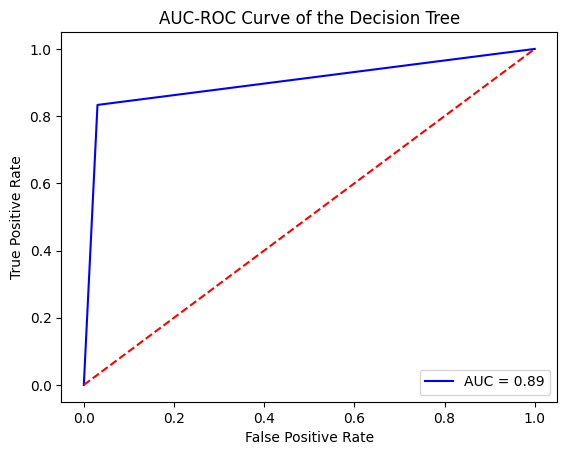

In [102]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

dectree.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = dectree.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(dectree, features_final, asd_class, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the Decision Tree')
plt.legend(loc='lower right')
plt.show()

(2) RANDOM FOREST

In [103]:
# Using RandomForestCLassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, features_final, asd_class, cv=10)
cv_scores.mean()

0.9288732394366198

In [104]:
ranfor = ranfor.fit(X_train, y_train)

In [105]:
# Predictions and Evaluation of RF Model

predictions_rf = ranfor.predict(X_test)
acc_rf = accuracy_score(y_true = y_test, y_pred = predictions_rf )
print("Overall accuracy of RFM using test-set is : %f" %(acc_rf*100))

Overall accuracy of RFM using test-set is : 92.907801


In [106]:
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        99
           1       0.90      0.86      0.88        42

    accuracy                           0.93       141
   macro avg       0.92      0.91      0.91       141
weighted avg       0.93      0.93      0.93       141



In [107]:
print(confusion_matrix(y_test, predictions_rf))

[[95  4]
 [ 6 36]]


In [108]:
# AUC Score and F-beta Score:

from sklearn.model_selection import cross_val_score
print('AUC Score:', cross_val_score(ranfor, features_final, asd_class, cv=10, scoring='roc_auc').mean())

ranfor.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 0.9794367375830223
F-Beta Score: 0.8910891089108911


AUC-ROC Score: 0.9794367375830223


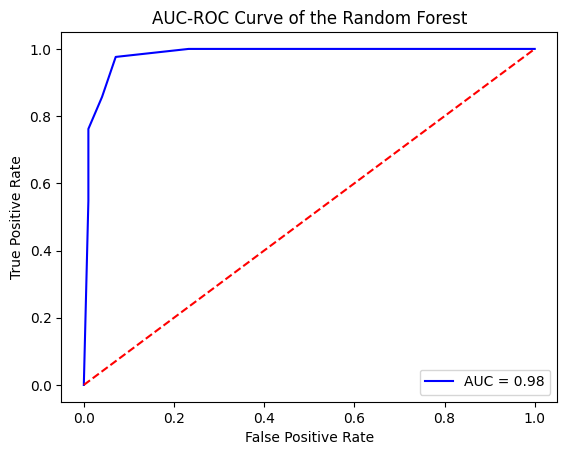

In [109]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

ranfor.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = ranfor.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(ranfor, features_final, asd_class, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the Random Forest')
plt.legend(loc='lower right')
plt.show()

(3) SUPPORT VECTOR MACHINES (SVM)

In [110]:
# Using svm.SVC with a linear kernel and see how well it does in comparison to the decision tree.

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2)

model_svm = SVC()

model_svm.fit(X_train, y_train)

SVC()

In [111]:
# Predictions and Evaluation of SVM Model

predictions_svm = model_svm.predict(X_test)
acc_svm = accuracy_score(y_true = y_test, y_pred = predictions_svm)
print("Overall accuracy of SVM using test-set is : %f" %(acc_svm*100))

Overall accuracy of SVM using test-set is : 99.290780


In [112]:
print(classification_report(y_test, predictions_svm, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        99
           1       0.98      1.00      0.99        42

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



In [113]:
print(confusion_matrix(y_test, predictions_svm))

[[98  1]
 [ 0 42]]


In [114]:
cv_scores = cross_val_score(svc, features_final, asd_class, cv=10)
cv_scores.mean()

1.0

In [115]:
# AUC Score and F-beta Score:

from sklearn.model_selection import cross_val_score
print('AUC Score:', cross_val_score(svc, features_final, asd_class, cv=10, scoring='roc_auc').mean())

svc.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 1.0
F-Beta Score: 1.0


AUC-ROC Score: 0.9996904024767803


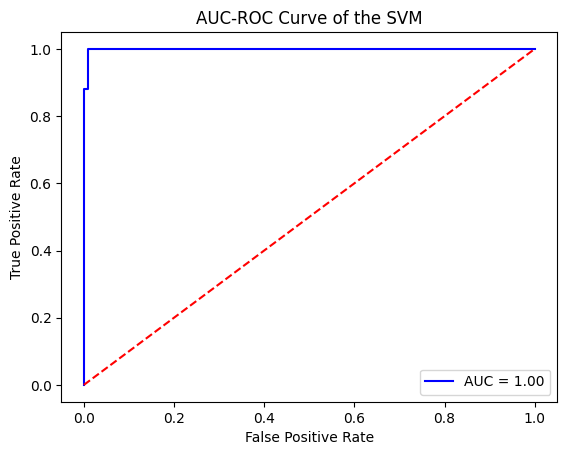

In [116]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

svc = SVC(probability = True)
svc.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = svc.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(svc, features_final, asd_class, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the SVM')
plt.legend(loc='lower right')
plt.show()

(4) K-NEAREST-NEIGHBOURS (KNN)

In [117]:
# Exploring the K-Nearest-Neighbors algorithm with a starting value of K=10. 
# K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on the particular data set.

from sklearn import neighbors
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, features_final, asd_class, cv=10)

cv_scores.mean()

0.9501810865191146

In [118]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [119]:
# Predictions and Evaluation of K-N-N Model

predictions_knn=knn.predict(X_test)
acc_knn = accuracy_score(y_true = y_test, y_pred = predictions_knn)
print("Overall accuracy of kNN using test-set is : %f" %(acc_knn*100))

Overall accuracy of kNN using test-set is : 95.744681


In [120]:
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        99
           1       0.93      0.93      0.93        42

    accuracy                           0.96       141
   macro avg       0.95      0.95      0.95       141
weighted avg       0.96      0.96      0.96       141



In [121]:
print(confusion_matrix(y_test, predictions_knn))

[[96  3]
 [ 3 39]]


In [122]:
# AUC Score and F-beta Score:

from sklearn.model_selection import cross_val_score
print('AUC Score:', cross_val_score(knn, features_final, asd_class, cv=10, scoring='roc_auc').mean())

knn.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 0.9895156915667751
F-Beta Score: 0.9285714285714286


AUC-ROC Score: 0.9895156915667751


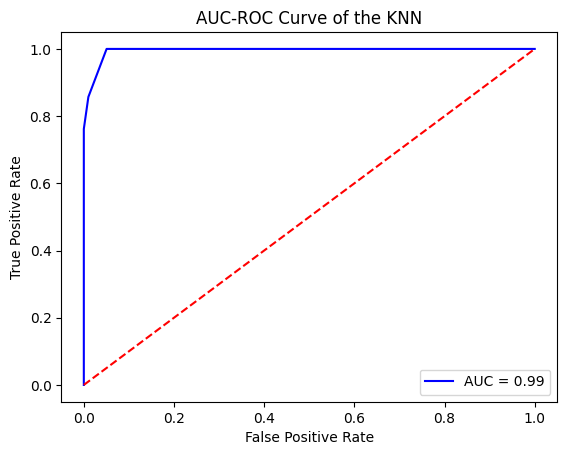

In [123]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

knn.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(knn, features_final, asd_class, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the KNN')
plt.legend(loc='lower right')
plt.show()

In [124]:
# Choosing K is tricky, so I can't discard KNN until I've tried different values of K. 
# Hence I write a for loop to run KNN with K values ranging from 10 to 50 and see if K makes a substantial difference.

for n in range(10, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final, asd_class, cv=10)
    print (n, cv_scores.mean())

10 0.968692152917505
11 0.9644064386317908
12 0.9758148893360161
13 0.9715492957746479
14 0.9801207243460764
15 0.9758350100603621
16 0.978672032193159
17 0.9715694164989941
18 0.9743863179074447
19 0.9744064386317908
20 0.9729778672032193
21 0.9744064386317908
22 0.9743863179074447
23 0.9715492957746479
24 0.9715694164989941
25 0.9729778672032193
26 0.9729778672032193
27 0.9758148893360161
28 0.9758148893360161
29 0.9772434607645876
30 0.9744064386317908
31 0.978672032193159
32 0.9772434607645876
33 0.9772434607645876
34 0.978672032193159
35 0.9801207243460764
36 0.9772635814889336
37 0.9744265593561368
38 0.9758551307847083
39 0.9744265593561368
40 0.978692152917505
41 0.974446680080483
42 0.9772635814889336
43 0.9758752515090544
44 0.9772837022132798
45 0.9758752515090544
46 0.9758752515090544
47 0.9758752515090544
48 0.9758752515090544
49 0.974446680080483


(5) NAIVE BAYES

In [125]:
# Trying naive_bayes.MultinomialNB classifier and testing how does its accuracy stack up.

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


nb = MultinomialNB()
cv_scores = cross_val_score(nb, features_final, asd_class, cv=10)

cv_scores.mean()

0.8876659959758552

In [126]:
nb.fit(X_train, y_train)

MultinomialNB()

In [127]:
# Predictions and Evaluation of NB Model

predictions_nb=nb.predict(X_test)
acc_nb = accuracy_score(y_true = y_test, y_pred = predictions_nb)
print("Overall accuracy of NB using test-set is : %f" %(acc_nb*100))

Overall accuracy of NB using test-set is : 92.198582


In [128]:
print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        99
           1       0.92      0.81      0.86        42

    accuracy                           0.92       141
   macro avg       0.92      0.89      0.90       141
weighted avg       0.92      0.92      0.92       141



In [129]:
print(confusion_matrix(y_test, predictions_nb))

[[96  3]
 [ 8 34]]


In [130]:
# AUC Score and F-beta Score:

from sklearn.model_selection import cross_val_score
print('AUC Score:', cross_val_score(nb, features_final, asd_class, cv=10, scoring='roc_auc').mean())

nb.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = nb.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 0.9498518165700828
F-Beta Score: 0.8947368421052632


AUC-ROC Score: 0.9498518165700828


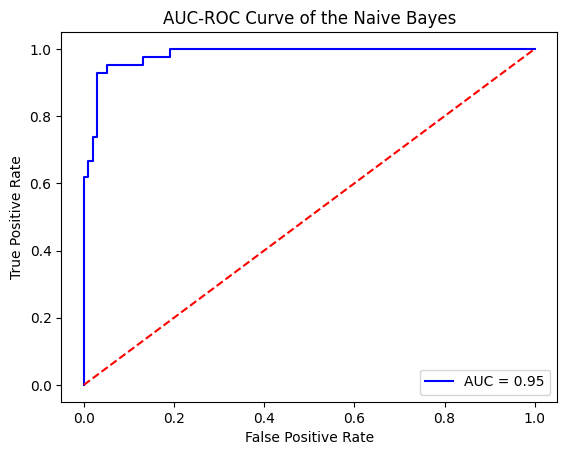

In [131]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

nb.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = nb.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(nb, features_final, asd_class, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the Naive Bayes')
plt.legend(loc='lower right')
plt.show()

(6) LOGISTIC REGRESSION

In [132]:
# Tried all these fancy techniques, but fundamentally this is just a binary classification problem. 
# Trying Logisitic Regression, which is a simple way to tackling this sort of thing.

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer.fit(features_final)

SimpleImputer()

In [133]:
features_final = imputer.transform(features_final)
features_final_1 = pd.DataFrame(features_final)
features_final_1.head().isnull().mean()

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
dtype: float64

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
logreg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(logreg, features_final_1, asd_class, cv=10)
cv_scores.mean()

0.9985714285714286

In [135]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [136]:
# Predictions and Evaluation of LR Model

predictions_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_true = y_test, y_pred = predictions_logreg)
print("Overall accuracy of LR using test-set is : %f" %(acc_logreg*100))

Overall accuracy of LR using test-set is : 100.000000


In [137]:
print(classification_report(y_test, predictions_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        42

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [138]:
print(confusion_matrix(y_test, predictions_logreg))

[[99  0]
 [ 0 42]]


In [139]:
# AUC Score and F-beta Score:

from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(logreg, features_final_1, asd_class, cv=10, scoring='roc_auc').mean()
print('AUC Score:', cv_scores_roc.mean())

logreg.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 1.0
F-Beta Score: 1.0


AUC-ROC Score: 1.0


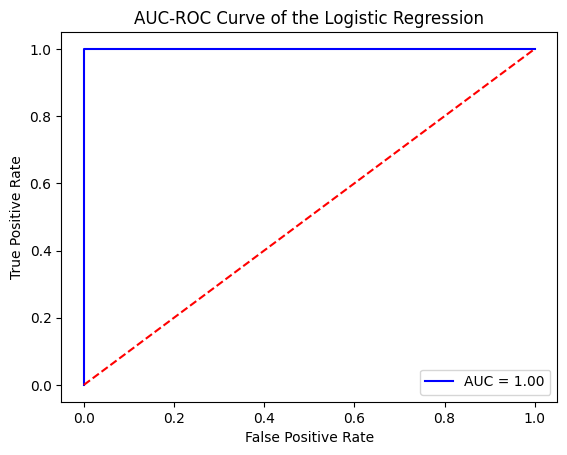

In [140]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

logreg.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(logreg, features_final, asd_class, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the Logistic Regression')
plt.legend(loc='lower right')
plt.show()

(7) LINEAR DISCRIMINANT ANALYSIS (LDA)

In [141]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lda = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(lda, features_final, asd_class, cv=10)
cv_scores.mean()

0.9587525150905434

In [142]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [143]:
# Predictions and Evaluation of LDA Model

predictions_lda = lda.predict(X_test)
acc_lda = accuracy_score(y_true = y_test, y_pred = predictions_lda)
print("Overall accuracy of LDA using test-set is : %f" %(acc_lda*100))

Overall accuracy of LDA using test-set is : 98.581560


In [144]:
print(classification_report(y_test, predictions_lda))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        99
           1       0.98      0.98      0.98        42

    accuracy                           0.99       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.99      0.99      0.99       141



In [145]:
print(confusion_matrix(y_test, predictions_lda))

[[98  1]
 [ 1 41]]


In [146]:
# AUC Score and F-beta Score:

from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(lda, features_final_1, asd_class, cv=10, scoring='roc_auc').mean()
print('AUC Score:', cv_scores_roc.mean())

lda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = lda.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 0.9923579688285571
F-Beta Score: 0.9761904761904762


AUC-ROC Score: 0.9923579688285571


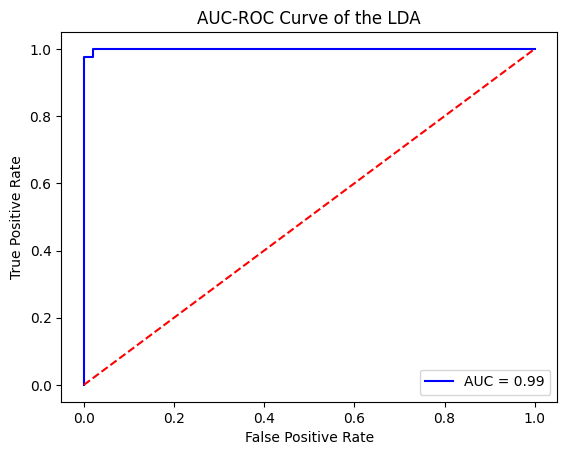

In [147]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

lda.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = lda.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(lda, features_final, asd_class, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the LDA')
plt.legend(loc='lower right')
plt.show()

(8) QUADRATIC DISCRIMINANT ANALYSIS (QDA)

In [148]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
qda = QuadraticDiscriminantAnalysis()
cv_scores = cross_val_score(qda, features_final, asd_class, cv=10)
cv_scores.mean()

0.9601609657947685

In [149]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [150]:
# Predictions and Evaluation of QDA Model

predictions_qda = qda.predict(X_test)
acc_qda = accuracy_score(y_true = y_test, y_pred = predictions_qda)
print("Overall accuracy of QDA using test-set is : %f" %(acc_qda*100))

Overall accuracy of QDA using test-set is : 97.163121


In [151]:
print(classification_report(y_test, predictions_qda))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        99
           1       1.00      0.90      0.95        42

    accuracy                           0.97       141
   macro avg       0.98      0.95      0.97       141
weighted avg       0.97      0.97      0.97       141



In [152]:
print(confusion_matrix(y_test, predictions_qda))

[[99  0]
 [ 4 38]]


In [153]:
# AUC Score and F-beta Score:

from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(qda, features_final_1, asd_class, cv=10, scoring='roc_auc').mean()
print('AUC Score:', cv_scores_roc.mean())

qda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = qda.predict(X_test)
print('F-Beta Score:', fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

AUC Score: 0.9898947500727686
F-Beta Score: 0.9793814432989691


AUC-ROC Score: 0.9898947500727686


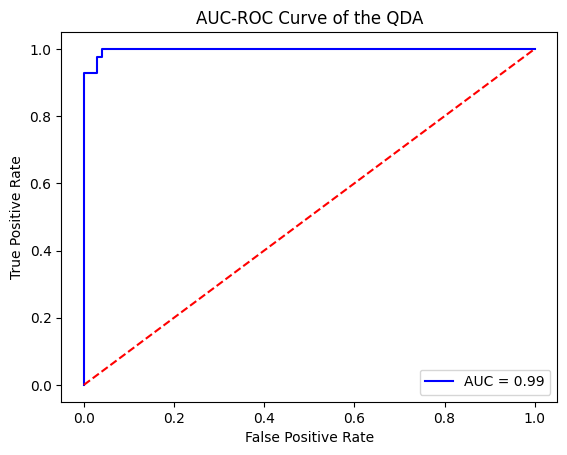

In [154]:
# Generating AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

qda.fit(X_train, y_train)

# Making predictions and computing AUC-ROC

y_pred_proba = qda.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = cross_val_score(qda, features_final, asd_class, cv=10, scoring='roc_auc').mean()
print("AUC-ROC Score:", auc_roc)

# Plotting ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of the QDA')
plt.legend(loc='lower right')
plt.show()

CONCLUSION

After experimenting with several learning methods on the ASD dataset, I've come to the conclusion that all of our models do incredibly well with the data. We measured the performance of our models using three distinct metrics (accuracy, AUC score, and F-score), and it appears that each statistic showed nearly faultless categorization of the ASD cases. I believe we need access to more substantial datasets in order to develop a more accurate model. In this case, the number of occurrences following data cleaning was insufficient to support the assertion that this model is ideal.

COMPARING THE AUC-ROC CURVE OF EACH MODELS AND REPRESNETING IN GRAPHS.

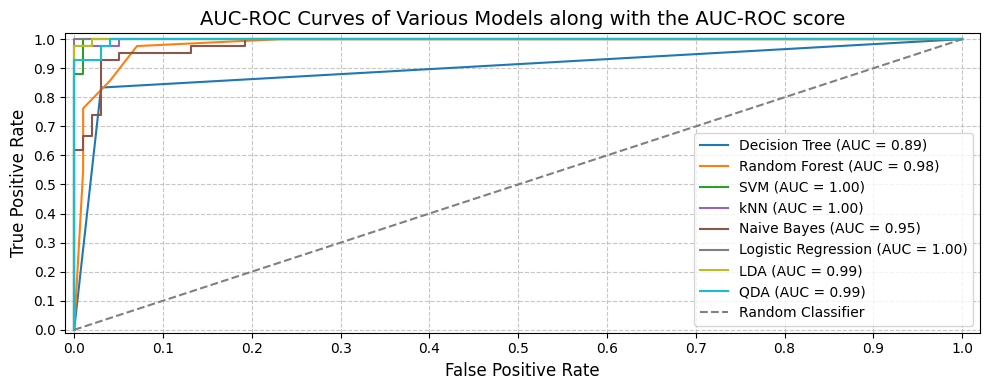

In [155]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Fitting different models and computing AUC-ROC scores

models = [dectree, ranfor, svc, knn, nb, logreg, lda, qda]  
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'kNN', 'Naive Bayes', 'Logistic Regression', 'LDA', 'QDA']
auc_rocs = []

plt.figure(figsize=(10,4))

# Defining the colors for different models
colors = plt.cm.tab10(np.linspace(0, 1, len(models)))

# Iterating over the models

for model, name, color in zip(models, model_names, colors):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    auc_roc = cross_val_score(model, features_final, asd_class, cv=10, scoring='roc_auc').mean()
    auc_rocs.append(auc_roc)
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_roc:.2f})', color=color)

# Plot random classifier line

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')

# Plot settings

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('AUC-ROC Curves of Various Models along with the AUC-ROC score', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 2.0, 0.1), fontsize=10)
plt.yticks(np.arange(0, 2.0, 0.1), fontsize=10)
plt.xlim([-0.01, 1.02])
plt.ylim([-0.01, 1.02])
plt.tight_layout()
plt.show()

COMPARING THE ACCURACY OF THE RESPECTIVE MODELS AND REPRESENTING IN GRAPHS

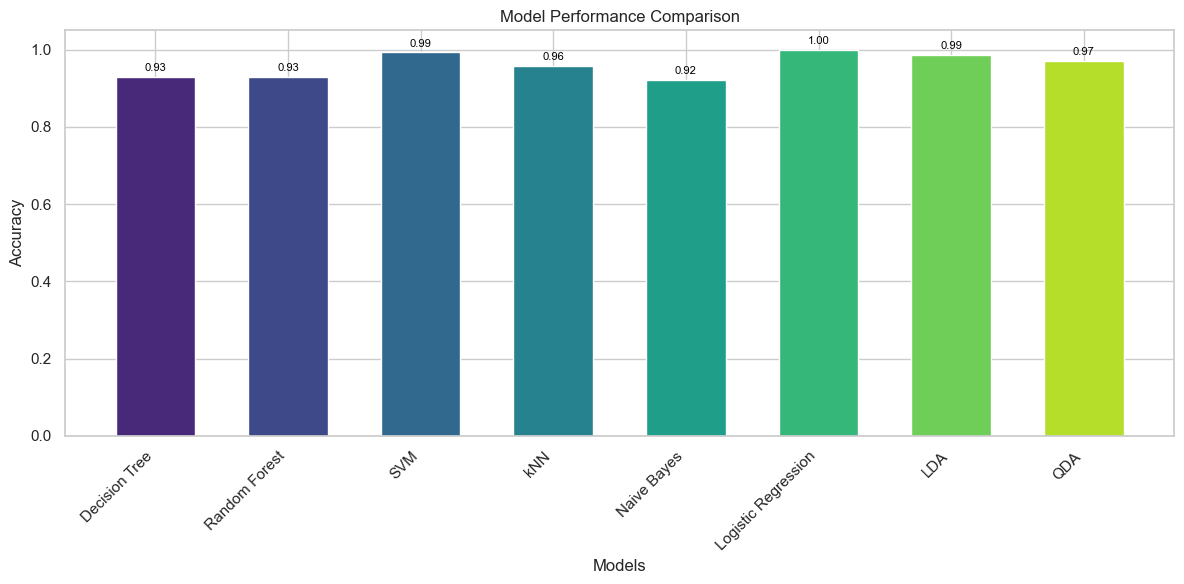

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

li_x = ['Decision Tree', 'Random Forest', 'SVM', 'kNN', 'Naive Bayes', 'Logistic Regression', 'LDA', 'QDA']
li_y = [acc_dectree, acc_rf, acc_svm, acc_knn, acc_nb, acc_logreg, acc_lda, acc_qda]

sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(12, 6))

# Using a sequential colormap for better color representation
colors = sns.color_palette("viridis", len(li_x))

# Adjusting bar positions and widths
bar_positions = range(len(li_x))
bar_width = 0.6

plt.bar(bar_positions, li_y, color=colors, width=bar_width, align='center')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")

for i, v in zip(bar_positions, li_y):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", va="bottom", fontsize=8, color="black")

plt.xticks(bar_positions, li_x, rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [157]:
# Creating a list of tuples with model names and their corresponding accuracies
model_accuracies = list(zip(li_x, li_y))

# Sorting the list of tuples based on accuracy (in descending order)
sorted_model_accuracies = sorted(model_accuracies, key=lambda x: x[1], reverse=True)

# Printing the top two models
top_models = sorted_model_accuracies[:2]

print("Top two models for predicting ASD using this Autistic Behavioural Dataset:")
for model, accuracy in top_models:
    print(f"{model}: {accuracy:.2f} accuracy")

Top two models for predicting ASD using this Autistic Behavioural Dataset:
Logistic Regression: 1.00 accuracy
SVM: 0.99 accuracy


In [158]:
print(column_names)

print(type(column_names))

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'ethnicity', 'country_of_res', 'relation']
<class 'list'>


In [159]:
print(type(asd_class))
print(type(features_final))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


APPLYING WRAPPING TECHNIQUE IN THE FEATURES TO PROBABLE IMPROVEMENT OF ACCURACY

Model: Decision Tree
Number of features selected for wrapping: 15
Previous accuracies: [0.9290780141843972]
Best accuracy: 0.9787234042553191
Improvement in accuracy: 0.049645390070921946

Model: Random Forest
Number of features selected for wrapping: 15
Previous accuracies: [0.9290780141843972]
Best accuracy: 0.9858156028368794
Improvement in accuracy: 0.05673758865248224

Model: SVM
Number of features selected for wrapping: 15
Previous accuracies: [0.9929078014184397]
Best accuracy: 0.9929078014184397
Improvement in accuracy: 0.0

Model: kNN
Number of features selected for wrapping: 15
Previous accuracies: [0.9574468085106383]
Best accuracy: 0.9716312056737588
Improvement in accuracy: 0.014184397163120477

Model: Naive Bayes
Number of features selected for wrapping: 15
Previous accuracies: [0.9219858156028369]
Best accuracy: 0.9219858156028369
Improvement in accuracy: 0.0

Model: Logistic Regression
Number of features selected for wrapping: 15
Previous accuracies: [1.0]
Best accuracy

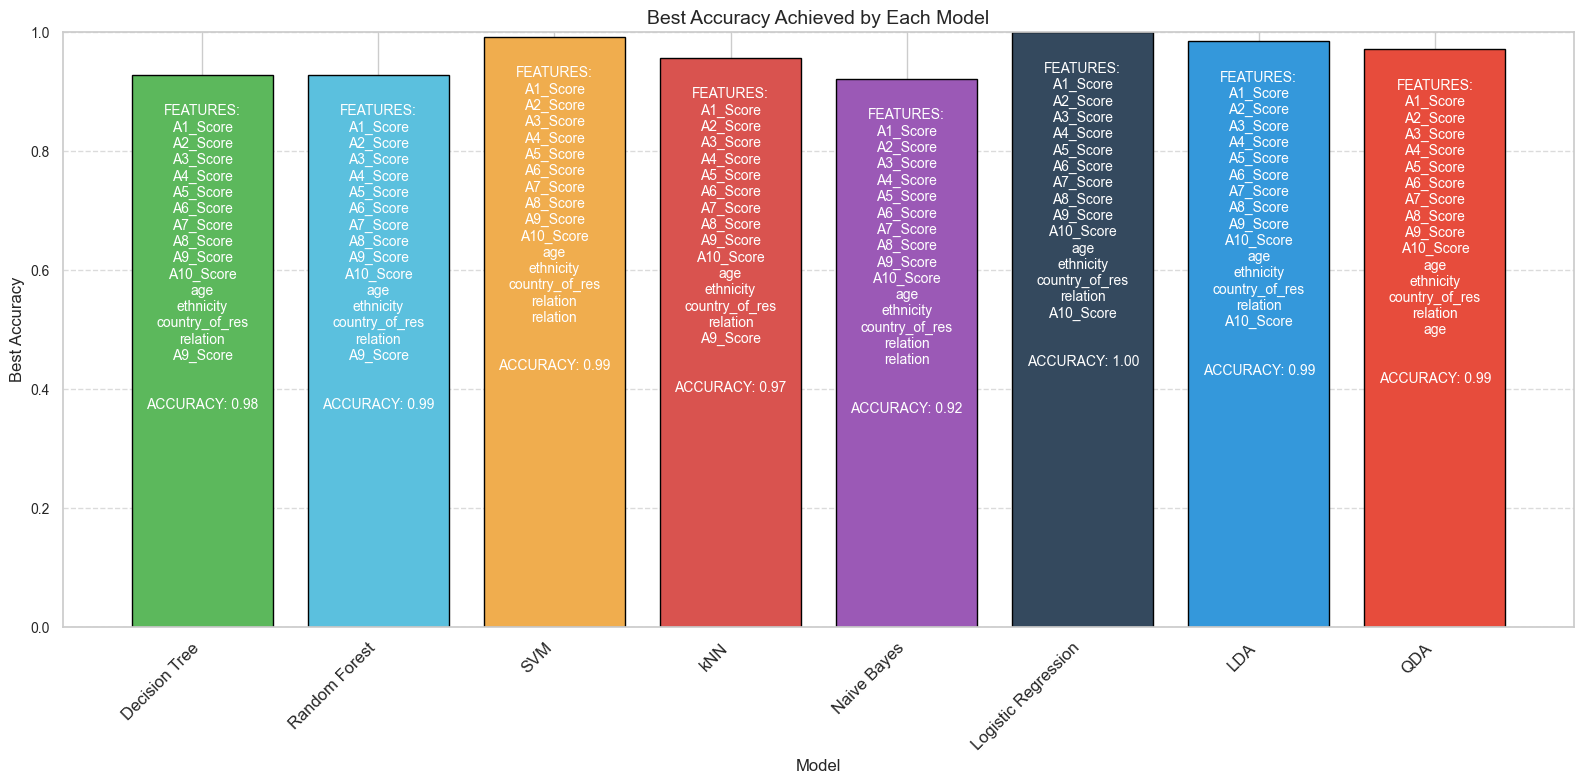

In [160]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_class, train_size=0.80, random_state=1)

def forward_selection(X_train, X_test, y_train, y_test, model):
    selected_features = []
    best_accuracy = 0.0
    
    while True:
        # Initializing variables to keep track of the best feature and its accuracy
        best_feature = None
        best_feature_accuracy = 0.0
        
        # Iterating through the remaining features
        for feature in range(X_train.shape[1]):
            
            # Checking if the feature is already selected
            if feature not in selected_features:
                
                # Adding the feature to the selected features
                selected_features.append(feature)
                
                # Convert selected_features to a NumPy array for indexing
                selected_features_array = np.array(selected_features)
                
                # Training the model with the selected features
                model.fit(X_train[:, selected_features_array], y_train)
                
                # Making predictions on the test set
                y_pred = model.predict(X_test[:, selected_features_array])
                
                # Calculating the accuracy
                accuracy = accuracy_score(y_test, y_pred)
                
                # Checking if this feature improves the accuracy
                if accuracy > best_feature_accuracy:
                    best_feature = feature
                    best_feature_accuracy = accuracy
        
        # If no feature improved accuracy, break the loop
        if best_feature is None:
            break
        
        # Update the best accuracy
        best_accuracy = best_feature_accuracy
        
        # Add the best feature to the selected features
        selected_features.append(best_feature)
    
    return selected_features, best_accuracy

# Defining the feature names
feature_names = column_names

# The previous accuracies of the models
li_x = ['Decision Tree', 'Random Forest', 'SVM', 'kNN', 'Naive Bayes', 'Logistic Regression', 'LDA', 'QDA']
li_y = [acc_dectree, acc_rf, acc_svm, acc_knn, acc_nb, acc_logreg, acc_lda, acc_qda]

# Defining the list of the models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "SVM": SVC(random_state=1),
    "kNN": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(random_state=1),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Showing the output features and accuracy
def print_results(model_name, selected_features, best_accuracy, previous_accuracies):
    selected_feature_names = [feature_names[i] for i in selected_features]
    print(f"Model: {model_name}")
    print("Number of features selected for wrapping:", len(selected_features))
    print("Previous accuracies:", previous_accuracies)
    print("Best accuracy:", best_accuracy)
    print("Improvement in accuracy:", best_accuracy - max(previous_accuracies) if previous_accuracies else 0.0)
    print()
    return selected_feature_names, best_accuracy


# Storing the results of forward selection for each model
results = {}

for model_name, model in models.items():
    previous_accuracies = []
    if model_name in li_x:
        previous_accuracies.append(li_y[li_x.index(model_name)])
    selected_features, best_accuracy = forward_selection(X_train, X_test, y_train, y_test, model)
    selected_feature_names, best_accuracy = print_results(model_name, selected_features, best_accuracy, previous_accuracies)
    results[model_name] = (selected_feature_names, best_accuracy)

# Plotting the bar graph with custom styling
plt.figure(figsize=(16, 8))
bars = plt.bar(li_x, li_y, color=['#5cb85c', '#5bc0de', '#f0ad4e', '#d9534f', '#9b59b6', '#34495e', '#3498db', '#e74c3c'], edgecolor='black')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel('Model', fontsize=12)
plt.ylabel('Best Accuracy', fontsize=12)
plt.title('Best Accuracy Achieved by Each Model', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=10)
plt.ylim(0, 1)

# Annotating the bars with the selected features and accuracy
for bar, model_name in zip(bars, li_x):
    selected_features, best_accuracy = results[model_name]
    feature_text = '\n'.join([f"{feature}" for feature in selected_features]) 
    annotation_text = "FEATURES:\n" + feature_text + "\n\n\nACCURACY: {:.2f}".format(best_accuracy)
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, annotation_text,
             ha='center', va='top', fontsize=10, color='white', wrap=True)

plt.tight_layout()
plt.show()